In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import trompy as tp
import csv
from datetime import datetime, timedelta


# the next two lines will expand the printed tables
pd.options.display.max_rows= 40000
pd.options.display.max_columns= 40000


ctl_color= "gray"
exp_color="deepskyblue"
fig_folder=r"../plots\\"
READ_METAFILE= pd.read_excel(r"../FEDXD_METAFILE.xls" ,sheet_name="METAFILE" )

#READ_METAFILE


[Link to Choice_1_MEAL_COMPONENT](#Choice_1_MEAL_COMPONENT)

[Link to Choice_1_SNACK_COMPONENT](#Choice_1_SNACK_COMPONENT)


[Link to Choice_2_MEAL_COMPONENT](#Choice_2_MEAL_COMPONENT)

[Link to Choice_2_SNACK_COMPONENT](#Choice_2_SNACK_COMPONENT)


[Link to Choice_3_MEAL_COMPONENT](#Choice_3_MEAL_COMPONENT)

[Link to Choice_3_SNACK_COMPONENT](#Choice_3_SNACK_COMPONENT)

[Link to Choice_4_MEAL_COMPONENT](#Choice_4_MEAL_COMPONENT)

[Link to Choice_4_SNACK_COMPONENT](#Choice_4_SNACK_COMPONENT)

In [12]:
data= pd.read_csv("../results/MIX_MODE.csv")
data

Unnamed: 0   MOUSEID SEX MODE DIET  CHOICE_SESSION PELLET_TYPE  COUNT  \
0             0   FEDXDF1   F   FF   PR             0.0         MIX    210   
1             1   FEDXDF1   F   FR   PR             0.0         MIX    296   
2             2   FEDXDF2   F   FF   PR             0.0         MIX    350   
3             3   FEDXDF2   F   FR   PR             0.0         MIX    330   
4             4   FEDXDF3   F   FF   PR             0.0         MIX    291   
5             5   FEDXDF3   F   FR   PR             0.0         MIX    375   
6             6   FEDXDF4   F   FF   PR             0.0         MIX    294   
7             7   FEDXDF4   F   FR   PR             0.0         MIX    312   
8             8   FEDXDF5   F   FF   PR             0.0         MIX    227   
9             9   FEDXDF5   F   FR   PR             0.0         MIX    363   
10           10   FEDXDF6   F   FF   PR             0.0         MIX    296   
11           11   FEDXDF6   F   FR   PR             0.0         MIX    328   
12           12   FEDXDF7   F   FF   PR             0.0         MIX    249   
13           13   FEDXDF7   F   FR   PR             0.0         MIX    328   
14           14   FEDXDF8   F   FF   PR             0.0         MIX    244   
15           15   FEDXDF8   F   FR   PR             0.0         MIX    316   
16           16   FEDXDF9   F   FF   PR             0.0         MIX    260   
17           17   FEDXDF9   F   FR   PR             0.0         MIX    275   
18           18  FEDXDF10   F   FF   PR             0.0         MIX    250   
19           19  FEDXDF10   F   FR   PR             0.0         MIX    301   
20           20   FEDXDF1   F   FR   PR             1.0       CAS20    112   
21           21   FEDXDF2   F   FR   PR             1.0       CAS20    118   
22           22   FEDXDF3   F   FR   PR             1.0       CAS20    111   
23           23   FEDXDF4   F   FR   PR             1.0       CAS20    136   
24           24   FEDXDF5   F   FR   PR             1.0       CAS20     96   
25           25   FEDXDF6   F   FR   PR             1.0       CAS20    149   
26           26   FEDXDF7   F   FR   PR             1.0       CAS20    141   
27           27   FEDXDF8   F   FR   PR             1.0       CAS20    100   
28           28   FEDXDF9   F   FR   PR             1.0       CAS20    108   
29           29  FEDXDF10   F   FR   PR             1.0       CAS20     72   
30           30   FEDXDF1   F   FR   PR             1.0        CAS5     65   
31           31   FEDXDF2   F   FR   PR             1.0        CAS5     38   
32           32   FEDXDF3   F   FR   PR             1.0        CAS5     89   
33           33   FEDXDF4   F   FR   PR             1.0        CAS5     48   
34           34   FEDXDF5   F   FR   PR             1.0        CAS5     50   
35           35   FEDXDF6   F   FR   PR             1.0        CAS5     45   
36           36   FEDXDF7   F   FR   PR             1.0        CAS5     62   
37           37   FEDXDF8   F   FR   PR             1.0        CAS5     68   
38           38   FEDXDF9   F   FR   PR             1.0        CAS5     86   
39           39  FEDXDF10   F   FR   PR             1.0        CAS5     77   
40           40   FEDXDF1   F   FR   PR             2.0       CAS20    188   
41           41   FEDXDF2   F   FR   PR             2.0       CAS20    112   
42           42   FEDXDF3   F   FR   PR             2.0       CAS20    129   
43           43   FEDXDF4   F   FR   PR             2.0       CAS20    128   
44           44   FEDXDF5   F   FR   PR             2.0       CAS20    114   
45           45   FEDXDF6   F   FR   PR             2.0       CAS20    216   
46           46   FEDXDF7   F   FR   PR             2.0       CAS20    191   
47           47   FEDXDF8   F   FR   PR             2.0       CAS20    126   
48           48   FEDXDF9   F   FR   PR             2.0       CAS20    169   
49           49  FEDXDF10   F   FR   PR             2.0       CAS20     96   
50           50   FEDXDF1  

In [18]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_FF = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 0) & (data['DIET'] == 'NR') & (data["MODE"] == "FF")]
average_pellets_per_type_mnrFF= male_nr_pellet_FF.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()
male_nr_pellet_FR = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 0) & (data['DIET'] == 'NR') & (data["MODE"] == "FR")]
average_pellets_per_type_mnrFR= male_nr_pellet_FR.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()
male_nr_pellet_FR

Unnamed: 0   MOUSEID SEX MODE DIET  CHOICE_SESSION PELLET_TYPE  COUNT  \
306         306  FEDXDM11   M   FR   NR             0.0         MIX    293   
308         308  FEDXDM12   M   FR   NR             0.0         MIX    303   
310         310  FEDXDM13   M   FR   NR             0.0         MIX    324   
312         312  FEDXDM14   M   FR   NR             0.0         MIX    287   
314         314  FEDXDM15   M   FR   NR             0.0         MIX    292   
316         316  FEDXDM16   M   FR   NR             0.0         MIX    282   
318         318  FEDXDM17   M   FR   NR             0.0         MIX    316   
320         320  FEDXDM18   M   FR   NR             0.0         MIX    267   
322         322  FEDXDM19   M   FR   NR             0.0         MIX    362   
324         324  FEDXDM20   M   FR   NR             0.0         MIX    310   

     MEAL_SIZE  SNACK_SIZE  NUMBER_OF_MEALS  MEAL_FREQUENCY  NUMBER_OF_SNACKS  \
306   5.395833         1.0               48        1.019487                34   
308   3.671429         1.0               70        1.489635                46   
310   3.685714         1.0               70        1.489626                66   
312   5.312500         1.0               48        1.028082                32   
314   4.209677         1.0               62        1.383525                31   
316   3.909091         1.0               66        1.416520                24   
318   4.318182         1.0               66        1.409470                31   
320   4.470588         1.0               51        1.136476                39   
322   4.189189         1.0               74        1.583104                52   
324   3.337662         1.0               77        1.713533                53   

     SNACK_FREQUENCY  NUMBER_OF_MEGA_MEALS  AVERAGE_MEGA_MEAL_SIZE  \
306         0.722137                    22                8.181818   
308         0.978903                    11                7.181818   
310         1.404504                    12                8.250000   
312         0.685388                    20                8.200000   
314         0.691763                    13                7.923077   
316         0.515098                    14                7.285714   
318         0.662024                    16                7.687500   
320         0.869070                    11                8.636364   
322         1.112451                    16                8.437500   
324         1.179445                    13                7.000000   

     MEALS_HOUR_0  MEALS_HOUR_1  MEALS_HOUR_2  MEALS_HOUR_3  MEALS_HOUR_4  \
306           2.0           0.0           3.0           0.0           0.0   
308           5.0           1.0           2.0           0.0           0.0   
310           2.0           0.0           3.0           0.0           0.0   
312           5.0           4.0           3.0           0.0           3.0   
314           4.0           0.0           5.0           0.0           0.0   
316           5.0           4.0           2.0           1.0           1.0   
318           6.0           0.0           5.0           0.0           1.0   
320           1.0           3.0           0.0           0.0           2.0   
322           6.0           3.0           4.0           0.0           2.0   
324           4.0           0.0           5.0           0.0           0.0   

     MEALS_HOUR_5  MEALS_HOUR_6  MEALS_HOUR_7  MEALS_HOUR_8  MEALS_HOUR_9  \
306           1.0           0.0           0.0           1.0           0.0   
308           1.0           1.0           0.0           1.0           1.0   
310           0.0           0.0           0.0           0.0           0.0   
312           0.0           0.0           1.0           0.0           0.0   
314           1.0           0.0           0.0           1.0           0.0   
316           0.0           0.0           0.0           1.0           0.0   
318           1.0           1.0           0.0           0.0           1.0   
320           0.0  

In [27]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_FF = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 0) & (data['DIET'] == 'NR') & (data["MODE"] == "FF")]
average_pellets_per_type_mnrFF= male_nr_pellet_FF.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()
male_nr_pellet_FR = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 0) & (data['DIET'] == 'NR') & (data["MODE"] == "FR")]
average_pellets_per_type_mnrFR= male_nr_pellet_FR.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()


mnr_FF= average_pellets_per_type_mnrFF['MIX']
mnr_FR= average_pellets_per_type_mnrFR['MIX']



group_data_mnr_FF = [mnr_FF.tolist()]
group_data_mnr_FR = [mnr_FR.tolist()]


[[256.0, 257.0, 249.0, 326.0, 263.0, 365.0, 259.0, 254.0, 263.0, 234.0]]

<a id="Choice_1_MEAL_COMPONENT"></a>
## Choice_1_MEAL_COMPONENT

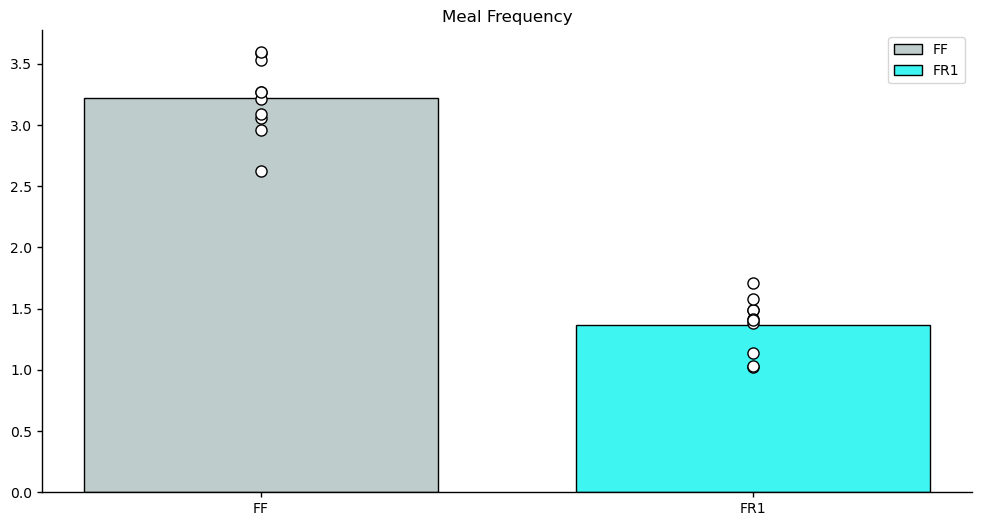

In [37]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_FF = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 0) & (data['DIET'] == 'NR') & (data["MODE"] == "FF")]
average_pellets_per_type_mnrFF= male_nr_pellet_FF.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()
male_nr_pellet_FR = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 0) & (data['DIET'] == 'NR') & (data["MODE"] == "FR")]
average_pellets_per_type_mnrFR= male_nr_pellet_FR.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()


mnr_FF= average_pellets_per_type_mnrFF['MIX']
mnr_FR= average_pellets_per_type_mnrFR['MIX']



group_data_mnr_FF = [mnr_FF.tolist()]
group_data_mnr_FR = [mnr_FR.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_mnr_FF, group_data_mnr_FR],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR],
                                  # Adjust positions for clarity
                                )

ax.set_title("Meal Frequency")
ax.legend(barlist, ['FF', 'FR1'])

# Set custom x-axis labels
group_labels = ['FF', 'FR1']
ax.set_xticks([1,2])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()



C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


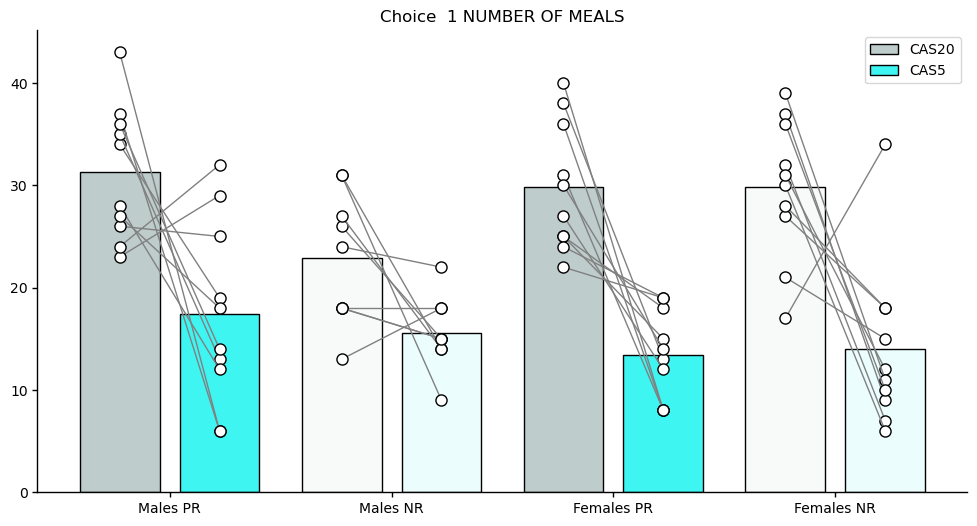

In [28]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  1 NUMBER OF MEALS")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C1_N_MEALS.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


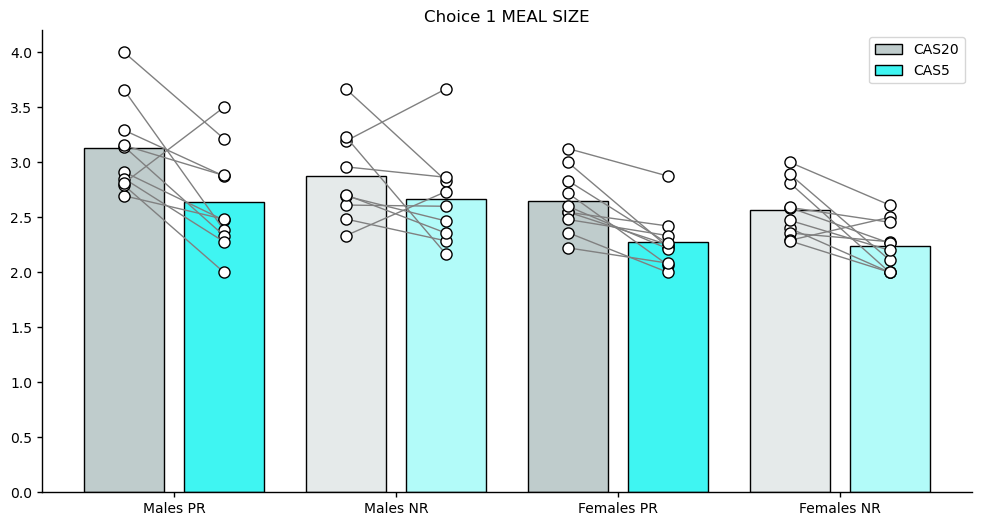

In [27]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice 1 MEAL SIZE")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C1_MEAL_SIZE.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


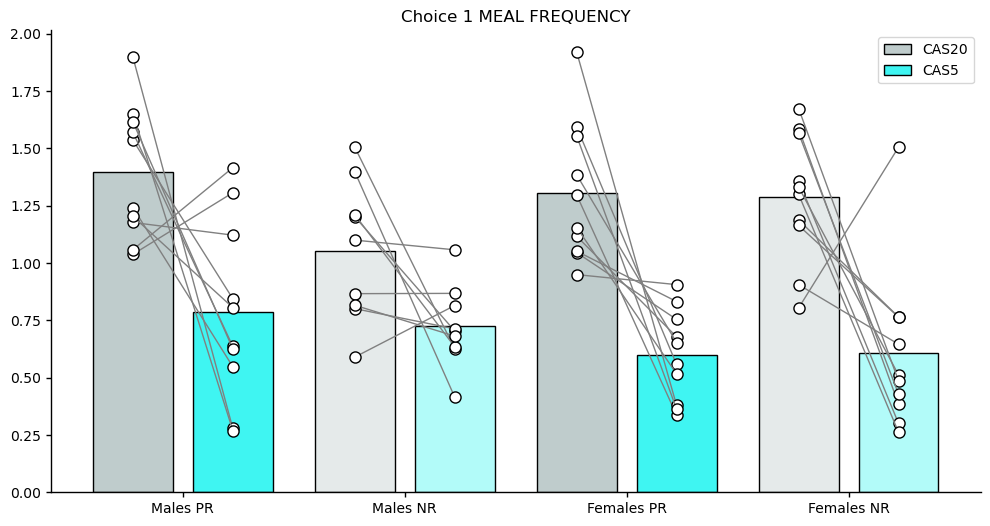

In [26]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice 1 MEAL FREQUENCY")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()
f.savefig(fig_folder + "C1_MEAL_FREQ.png")


C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


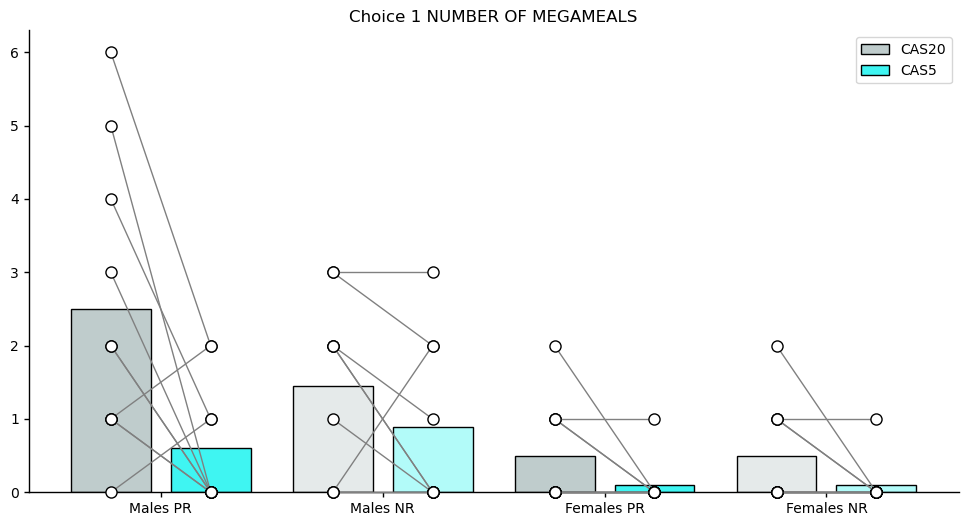

In [15]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice 1 NUMBER OF MEGAMEALS")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C1_N_MEGAMEALS.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


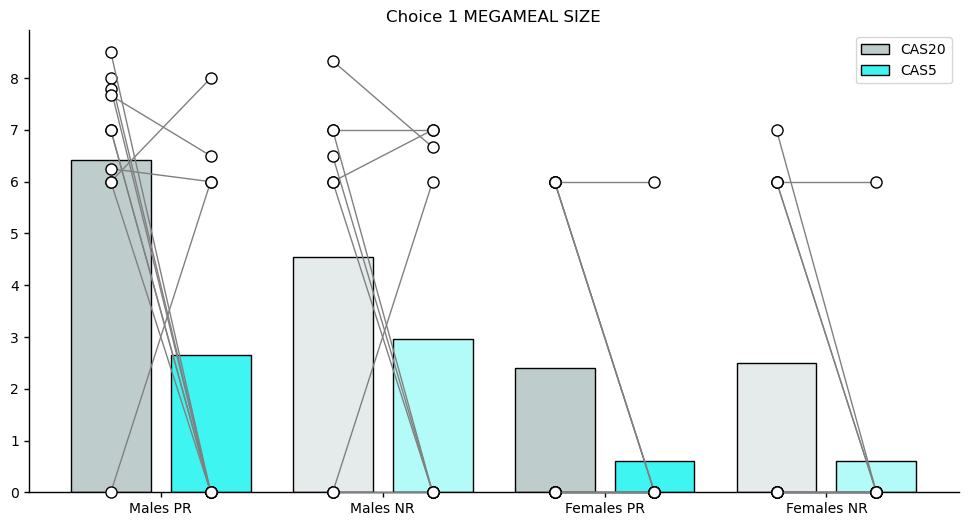

In [16]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice 1 MEGAMEAL SIZE")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()
f.savefig(fig_folder + "C1_MEGAMEAL_SIZE.png")


C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


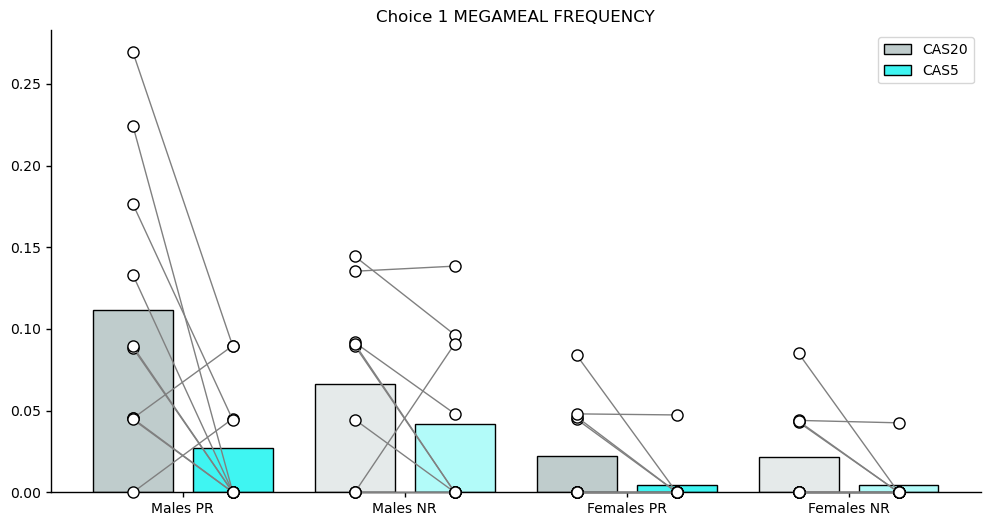

In [17]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice 1 MEGAMEAL FREQUENCY")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C1_MEGAMEAL_FREQ.png")

<a id="Choice_1_SNACK_COMPONENT"></a>
## Choice_1_SNACK_COMPONENT

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


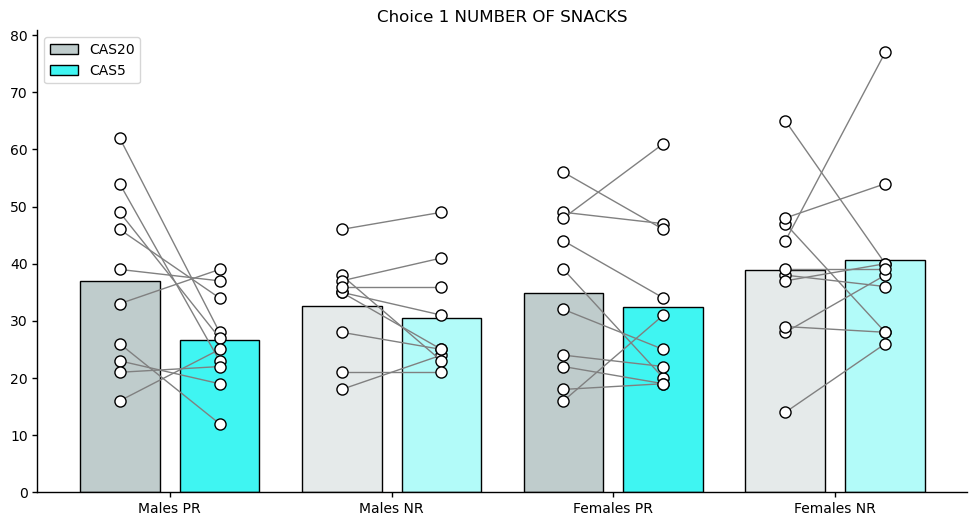

In [18]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice 1 NUMBER OF SNACKS")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C1_N_SNACKS.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


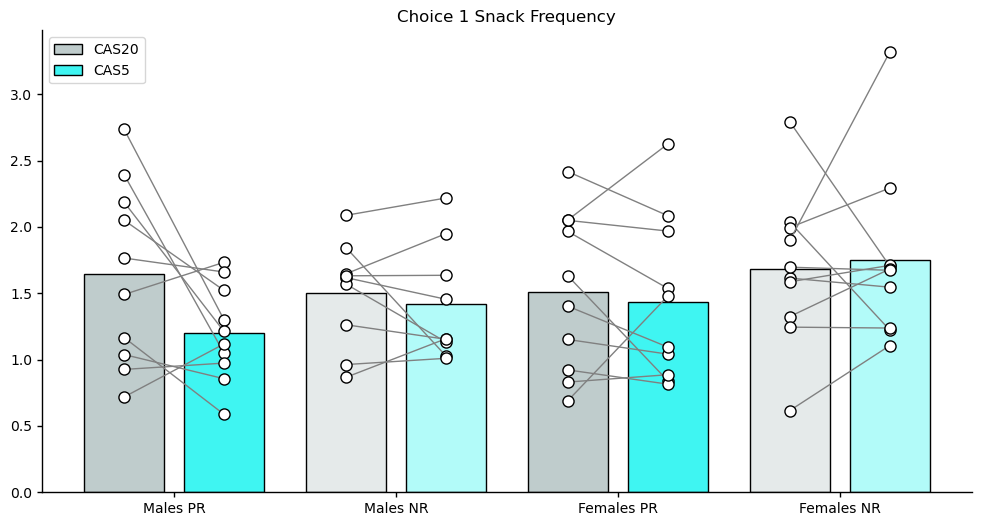

In [19]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr1= male_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()

female_nr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr1= female_nr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()


male_pr_pellet_C1 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr1= male_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()


female_pr_pellet_C1 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 1) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr1= female_pr_pellet_C1.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()

cas20_mpr1= average_pellets_per_type_mpr1['CAS20']
cas5_mpr1= average_pellets_per_type_mpr1['CAS5']
cas20_fpr1= average_pellets_per_type_fpr1['CAS20']
cas5_fpr1= average_pellets_per_type_fpr1['CAS5']

cas20_mnr1= average_pellets_per_type_mnr1['CAS20']
cas5_mnr1= average_pellets_per_type_mnr1['CAS5']
cas20_fnr1= average_pellets_per_type_fnr1['CAS20']
cas5_fnr1= average_pellets_per_type_fnr1['CAS5']

group_data_male_pr = [cas20_mpr1.tolist(), cas5_mpr1.tolist()]
group_data_female_pr = [cas20_fpr1.tolist(), cas5_fpr1.tolist()]
group_data_male_nr = [cas20_mnr1.tolist(), cas5_mnr1.tolist()]
group_data_female_nr = [cas20_fnr1.tolist(), cas5_fnr1.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.4)
cas5_color_NR = (0.247, 0.961, 0.949, 0.4)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice 1 Snack Frequency")
ax.legend(barlist, ['CAS20', 'CAS5'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C1_SNACK_FREQ.png")

<a id="Choice_2_MEAL_COMPONENT"></a>
## Choice_2_MEAL_COMPONENT

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


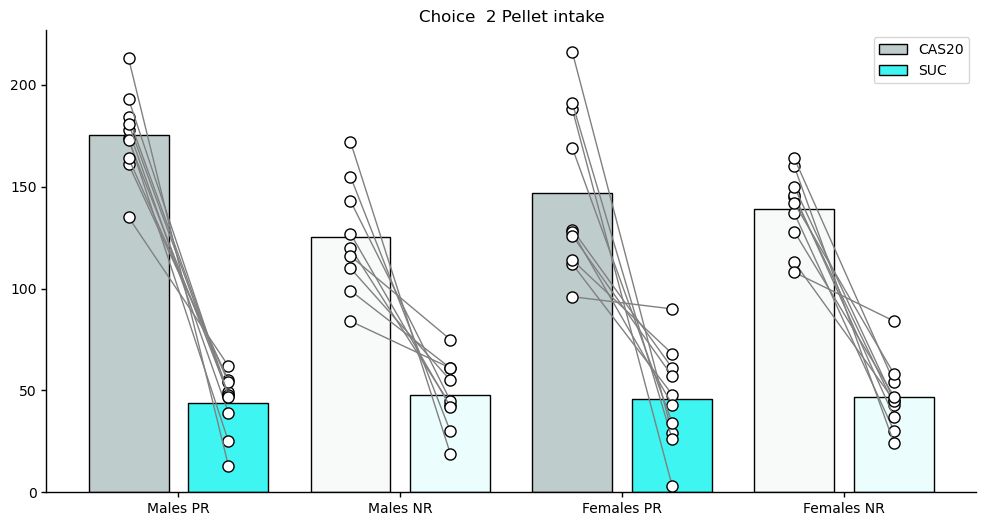

In [173]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr2= male_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()

female_nr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr2= female_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()


male_pr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr2= male_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()


female_pr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr2= female_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()

cas20_mpr2= average_pellets_per_type_mpr2['CAS20']
cas5_mpr2= average_pellets_per_type_mpr2['SUC']
cas20_fpr2= average_pellets_per_type_fpr2['CAS20']
cas5_fpr2= average_pellets_per_type_fpr2['SUC']

cas20_mnr2= average_pellets_per_type_mnr2['CAS20']
cas5_mnr2= average_pellets_per_type_mnr2['SUC']
cas20_fnr2= average_pellets_per_type_fnr2['CAS20']
cas5_fnr2= average_pellets_per_type_fnr2['SUC']

group_data_male_pr = [cas20_mpr2.tolist(), cas5_mpr2.tolist()]
group_data_female_pr = [cas20_fpr2.tolist(), cas5_fpr2.tolist()]
group_data_male_nr = [cas20_mnr2.tolist(), cas5_mnr2.tolist()]
group_data_female_nr = [cas20_fnr2.tolist(), cas5_fnr2.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  2 Pellet intake")
ax.legend(barlist, ['CAS20', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()
f.savefig(fig_folder + "C2_PELLET_INTAKE.png")


C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


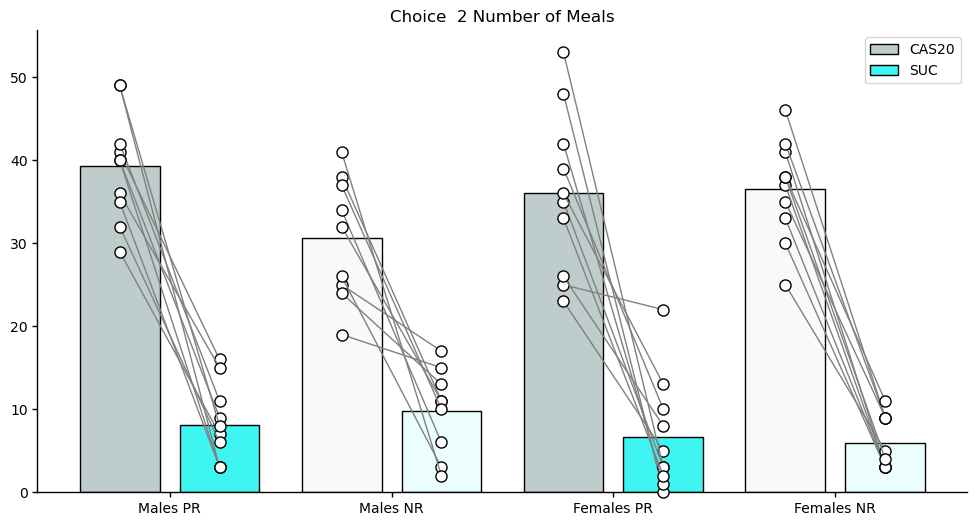

In [222]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr2= male_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()

female_nr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr2= female_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()


male_pr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr2= male_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()


female_pr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr2= female_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()

cas20_mpr2= average_pellets_per_type_mpr2['CAS20']
cas5_mpr2= average_pellets_per_type_mpr2['SUC']
cas20_fpr2= average_pellets_per_type_fpr2['CAS20']
cas5_fpr2= average_pellets_per_type_fpr2['SUC']

cas20_mnr2= average_pellets_per_type_mnr2['CAS20']
cas5_mnr2= average_pellets_per_type_mnr2['SUC']
cas20_fnr2= average_pellets_per_type_fnr2['CAS20']
cas5_fnr2= average_pellets_per_type_fnr2['SUC']

group_data_male_pr = [cas20_mpr2.tolist(), cas5_mpr2.tolist()]
group_data_female_pr = [cas20_fpr2.tolist(), cas5_fpr2.tolist()]
group_data_male_nr = [cas20_mnr2.tolist(), cas5_mnr2.tolist()]
group_data_female_nr = [cas20_fnr2.tolist(), cas5_fnr2.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  2 Number of Meals")
ax.legend(barlist, ['CAS20', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

#f.savefig(fig_folder + "C2_N_MEALS.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


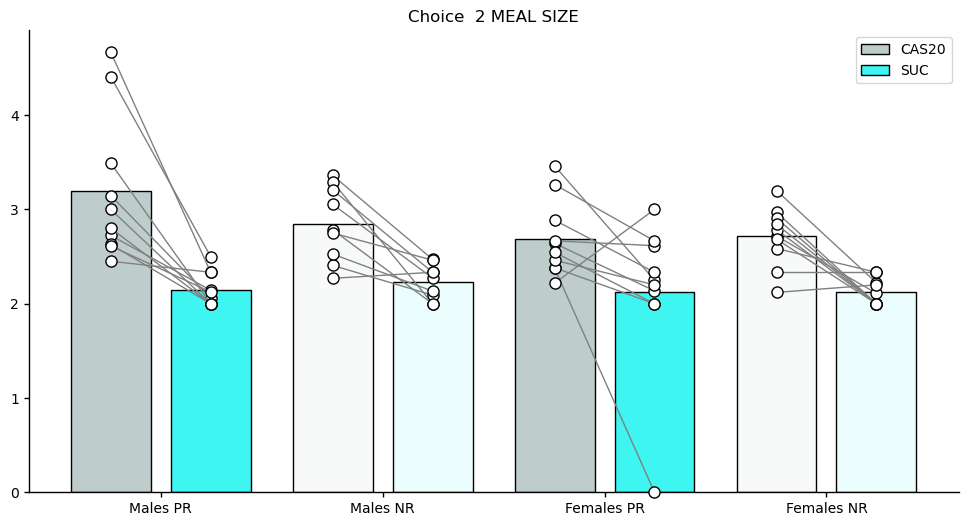

In [24]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr2= male_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()

female_nr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr2= female_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()


male_pr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr2= male_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()


female_pr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr2= female_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()

cas20_mpr2= average_pellets_per_type_mpr2['CAS20']
cas5_mpr2= average_pellets_per_type_mpr2['SUC']
cas20_fpr2= average_pellets_per_type_fpr2['CAS20']
cas5_fpr2= average_pellets_per_type_fpr2['SUC']

cas20_mnr2= average_pellets_per_type_mnr2['CAS20']
cas5_mnr2= average_pellets_per_type_mnr2['SUC']
cas20_fnr2= average_pellets_per_type_fnr2['CAS20']
cas5_fnr2= average_pellets_per_type_fnr2['SUC']

group_data_male_pr = [cas20_mpr2.tolist(), cas5_mpr2.tolist()]
group_data_female_pr = [cas20_fpr2.tolist(), cas5_fpr2.tolist()]
group_data_male_nr = [cas20_mnr2.tolist(), cas5_mnr2.tolist()]
group_data_female_nr = [cas20_fnr2.tolist(), cas5_fnr2.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  2 MEAL SIZE")
ax.legend(barlist, ['CAS20', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()
f.savefig(fig_folder + "C2_MEAL_SIZE.png")


C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


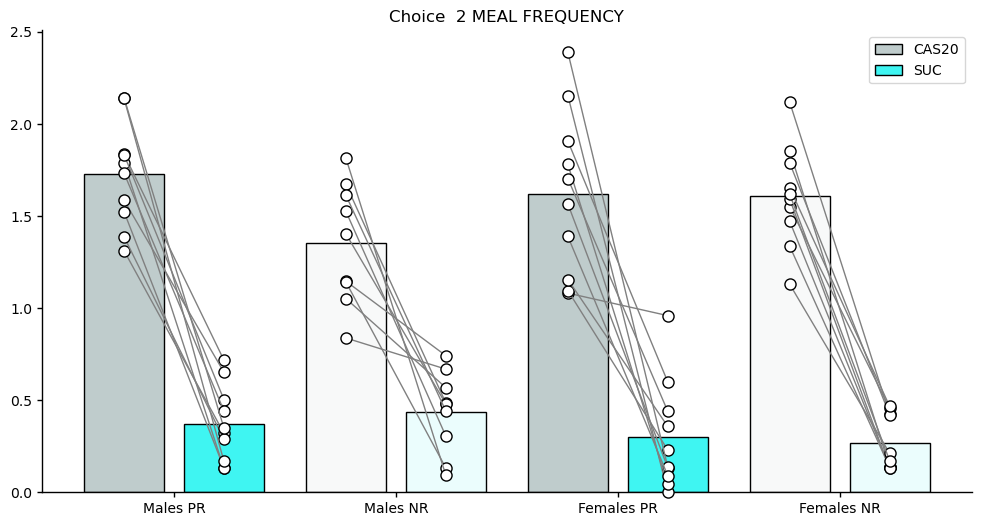

In [23]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr2= male_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()

female_nr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr2= female_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()


male_pr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr2= male_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()


female_pr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr2= female_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()

cas20_mpr2= average_pellets_per_type_mpr2['CAS20']
cas5_mpr2= average_pellets_per_type_mpr2['SUC']
cas20_fpr2= average_pellets_per_type_fpr2['CAS20']
cas5_fpr2= average_pellets_per_type_fpr2['SUC']

cas20_mnr2= average_pellets_per_type_mnr2['CAS20']
cas5_mnr2= average_pellets_per_type_mnr2['SUC']
cas20_fnr2= average_pellets_per_type_fnr2['CAS20']
cas5_fnr2= average_pellets_per_type_fnr2['SUC']

group_data_male_pr = [cas20_mpr2.tolist(), cas5_mpr2.tolist()]
group_data_female_pr = [cas20_fpr2.tolist(), cas5_fpr2.tolist()]
group_data_male_nr = [cas20_mnr2.tolist(), cas5_mnr2.tolist()]
group_data_female_nr = [cas20_fnr2.tolist(), cas5_fnr2.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  2 MEAL FREQUENCY")
ax.legend(barlist, ['CAS20', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()
f.savefig(fig_folder + "C2_MEAL_FREQ.png")


C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


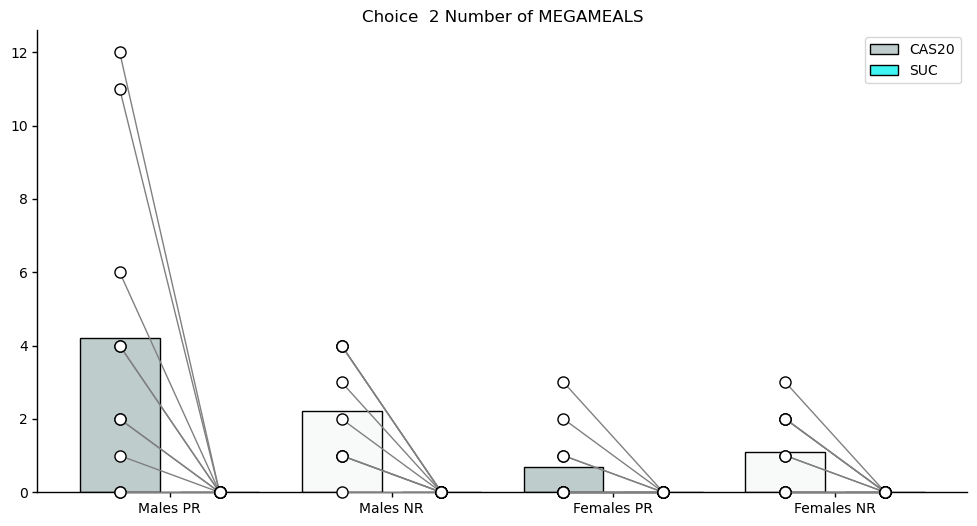

In [29]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr2= male_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

female_nr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr2= female_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


male_pr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr2= male_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


female_pr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr2= female_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

cas20_mpr2= average_pellets_per_type_mpr2['CAS20']
cas5_mpr2= average_pellets_per_type_mpr2['SUC']
cas20_fpr2= average_pellets_per_type_fpr2['CAS20']
cas5_fpr2= average_pellets_per_type_fpr2['SUC']

cas20_mnr2= average_pellets_per_type_mnr2['CAS20']
cas5_mnr2= average_pellets_per_type_mnr2['SUC']
cas20_fnr2= average_pellets_per_type_fnr2['CAS20']
cas5_fnr2= average_pellets_per_type_fnr2['SUC']

group_data_male_pr = [cas20_mpr2.tolist(), cas5_mpr2.tolist()]
group_data_female_pr = [cas20_fpr2.tolist(), cas5_fpr2.tolist()]
group_data_male_nr = [cas20_mnr2.tolist(), cas5_mnr2.tolist()]
group_data_female_nr = [cas20_fnr2.tolist(), cas5_fnr2.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  2 Number of MEGAMEALS")
ax.legend(barlist, ['CAS20', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C2_N_MEGAMEALS.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


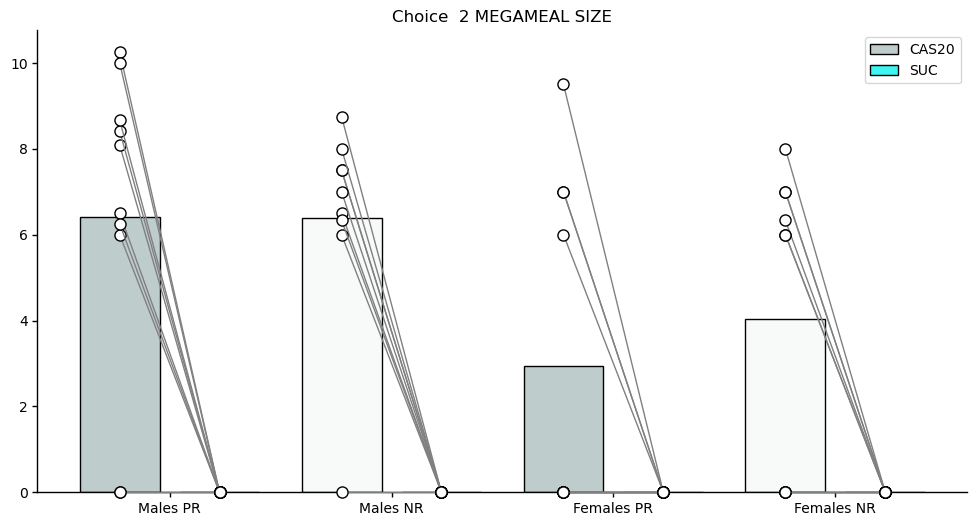

In [30]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr2= male_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()

female_nr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr2= female_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()


male_pr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr2= male_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()


female_pr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr2= female_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()

cas20_mpr2= average_pellets_per_type_mpr2['CAS20']
cas5_mpr2= average_pellets_per_type_mpr2['SUC']
cas20_fpr2= average_pellets_per_type_fpr2['CAS20']
cas5_fpr2= average_pellets_per_type_fpr2['SUC']

cas20_mnr2= average_pellets_per_type_mnr2['CAS20']
cas5_mnr2= average_pellets_per_type_mnr2['SUC']
cas20_fnr2= average_pellets_per_type_fnr2['CAS20']
cas5_fnr2= average_pellets_per_type_fnr2['SUC']

group_data_male_pr = [cas20_mpr2.tolist(), cas5_mpr2.tolist()]
group_data_female_pr = [cas20_fpr2.tolist(), cas5_fpr2.tolist()]
group_data_male_nr = [cas20_mnr2.tolist(), cas5_mnr2.tolist()]
group_data_female_nr = [cas20_fnr2.tolist(), cas5_fnr2.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  2 MEGAMEAL SIZE")
ax.legend(barlist, ['CAS20', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C2_MEGAMEAL_SIZE.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


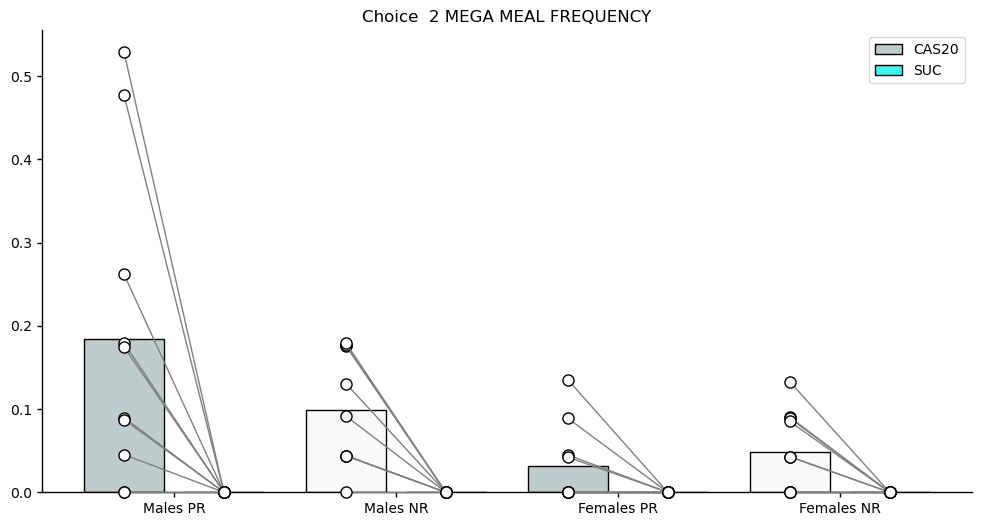

In [31]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr2= male_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()

female_nr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr2= female_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()


male_pr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr2= male_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()


female_pr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr2= female_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()

cas20_mpr2= average_pellets_per_type_mpr2['CAS20']
cas5_mpr2= average_pellets_per_type_mpr2['SUC']
cas20_fpr2= average_pellets_per_type_fpr2['CAS20']
cas5_fpr2= average_pellets_per_type_fpr2['SUC']

cas20_mnr2= average_pellets_per_type_mnr2['CAS20']
cas5_mnr2= average_pellets_per_type_mnr2['SUC']
cas20_fnr2= average_pellets_per_type_fnr2['CAS20']
cas5_fnr2= average_pellets_per_type_fnr2['SUC']

group_data_male_pr = [cas20_mpr2.tolist(), cas5_mpr2.tolist()]
group_data_female_pr = [cas20_fpr2.tolist(), cas5_fpr2.tolist()]
group_data_male_nr = [cas20_mnr2.tolist(), cas5_mnr2.tolist()]
group_data_female_nr = [cas20_fnr2.tolist(), cas5_fnr2.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  2 MEGA MEAL FREQUENCY")
ax.legend(barlist, ['CAS20', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C2_MEGAMEAL_FREQ.png")

<a id="Choice_2_SNACK_COMPONENT"></a>
## Choice_2_SNACK_COMPONENT

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


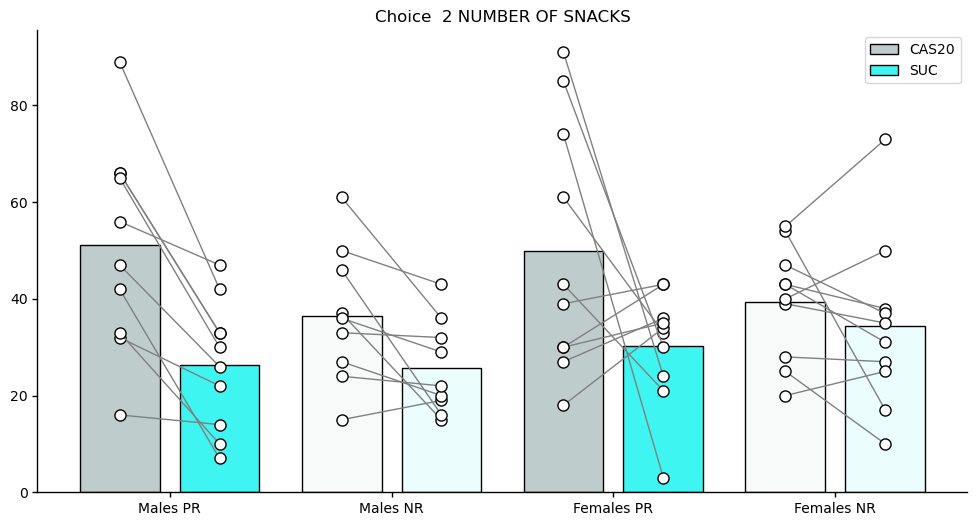

In [32]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr2= male_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()

female_nr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr2= female_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()


male_pr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr2= male_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()


female_pr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr2= female_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()

cas20_mpr2= average_pellets_per_type_mpr2['CAS20']
cas5_mpr2= average_pellets_per_type_mpr2['SUC']
cas20_fpr2= average_pellets_per_type_fpr2['CAS20']
cas5_fpr2= average_pellets_per_type_fpr2['SUC']

cas20_mnr2= average_pellets_per_type_mnr2['CAS20']
cas5_mnr2= average_pellets_per_type_mnr2['SUC']
cas20_fnr2= average_pellets_per_type_fnr2['CAS20']
cas5_fnr2= average_pellets_per_type_fnr2['SUC']

group_data_male_pr = [cas20_mpr2.tolist(), cas5_mpr2.tolist()]
group_data_female_pr = [cas20_fpr2.tolist(), cas5_fpr2.tolist()]
group_data_male_nr = [cas20_mnr2.tolist(), cas5_mnr2.tolist()]
group_data_female_nr = [cas20_fnr2.tolist(), cas5_fnr2.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  2 NUMBER OF SNACKS")
ax.legend(barlist, ['CAS20', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C2_N_SNACKS.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


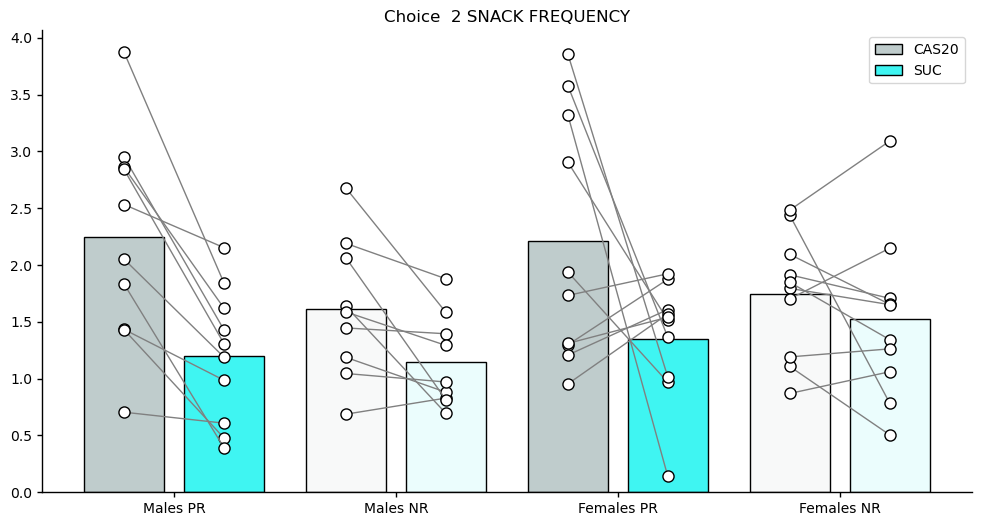

In [33]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr2= male_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()

female_nr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr2= female_nr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()


male_pr_pellet_C2 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr2= male_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()


female_pr_pellet_C2 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 2) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr2= female_pr_pellet_C2.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()

cas20_mpr2= average_pellets_per_type_mpr2['CAS20']
cas5_mpr2= average_pellets_per_type_mpr2['SUC']
cas20_fpr2= average_pellets_per_type_fpr2['CAS20']
cas5_fpr2= average_pellets_per_type_fpr2['SUC']

cas20_mnr2= average_pellets_per_type_mnr2['CAS20']
cas5_mnr2= average_pellets_per_type_mnr2['SUC']
cas20_fnr2= average_pellets_per_type_fnr2['CAS20']
cas5_fnr2= average_pellets_per_type_fnr2['SUC']

group_data_male_pr = [cas20_mpr2.tolist(), cas5_mpr2.tolist()]
group_data_female_pr = [cas20_fpr2.tolist(), cas5_fpr2.tolist()]
group_data_male_nr = [cas20_mnr2.tolist(), cas5_mnr2.tolist()]
group_data_female_nr = [cas20_fnr2.tolist(), cas5_fnr2.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  2 SNACK FREQUENCY")
ax.legend(barlist, ['CAS20', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()
f.savefig(fig_folder + "C2_SNACK_FREQ.png")


<a id="Choice_3_MEAL_COMPONENT"></a>
## Choice_3_MEAL_COMPONENT

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


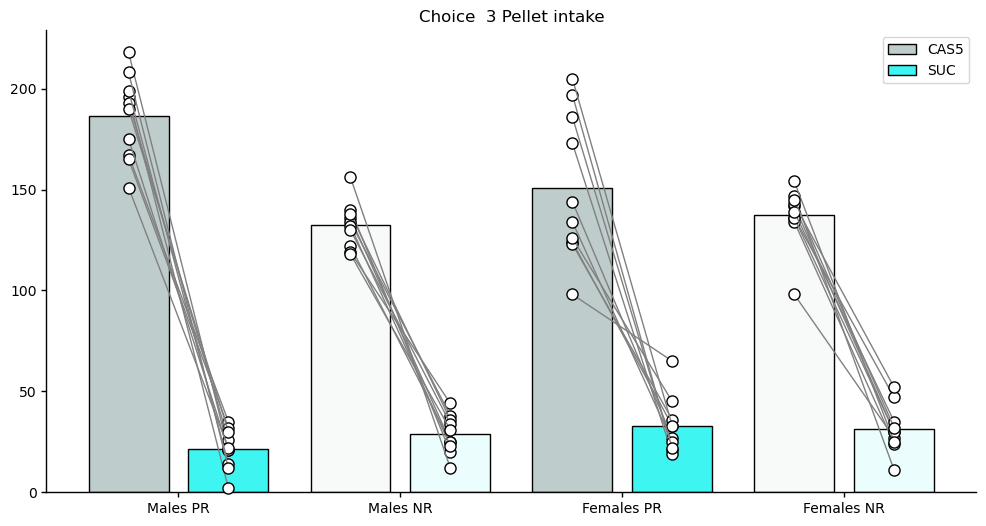

In [34]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr3= male_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()

female_nr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr3= female_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()


male_pr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr3= male_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()


female_pr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr3= female_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()

cas5_mpr3= average_pellets_per_type_mpr3['CAS5']
suc_mpr3= average_pellets_per_type_mpr3['SUC']
cas5_fpr3= average_pellets_per_type_fpr3['CAS5']
suc_fpr3= average_pellets_per_type_fpr3['SUC']

cas5_mnr3= average_pellets_per_type_mnr3['CAS5']
suc_mnr3= average_pellets_per_type_mnr3['SUC']
cas5_fnr3= average_pellets_per_type_fnr3['CAS5']
suc_fnr3= average_pellets_per_type_fnr3['SUC']

group_data_male_pr = [cas5_mpr3.tolist(), suc_mpr3.tolist()]
group_data_female_pr = [cas5_fpr3.tolist(), suc_fpr3.tolist()]
group_data_male_nr = [cas5_mnr3.tolist(), suc_mnr3.tolist()]
group_data_female_nr = [cas5_fnr3.tolist(), suc_fnr3.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  3 Pellet intake")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C3_PELLET_INTAKE.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


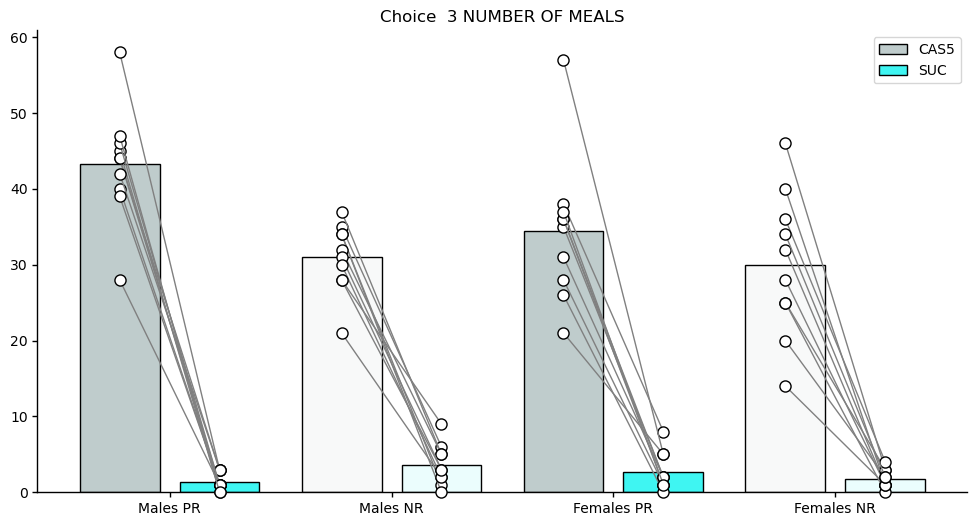

In [35]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr3= male_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()

female_nr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr3= female_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()


male_pr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr3= male_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()


female_pr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr3= female_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()

cas5_mpr3= average_pellets_per_type_mpr3['CAS5']
suc_mpr3= average_pellets_per_type_mpr3['SUC']
cas5_fpr3= average_pellets_per_type_fpr3['CAS5']
suc_fpr3= average_pellets_per_type_fpr3['SUC']

cas5_mnr3= average_pellets_per_type_mnr3['CAS5']
suc_mnr3= average_pellets_per_type_mnr3['SUC']
cas5_fnr3= average_pellets_per_type_fnr3['CAS5']
suc_fnr3= average_pellets_per_type_fnr3['SUC']

group_data_male_pr = [cas5_mpr3.tolist(), suc_mpr3.tolist()]
group_data_female_pr = [cas5_fpr3.tolist(), suc_fpr3.tolist()]
group_data_male_nr = [cas5_mnr3.tolist(), suc_mnr3.tolist()]
group_data_female_nr = [cas5_fnr3.tolist(), suc_fnr3.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  3 NUMBER OF MEALS")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()
f.savefig(fig_folder + "C3_N_MEALS.png")


C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


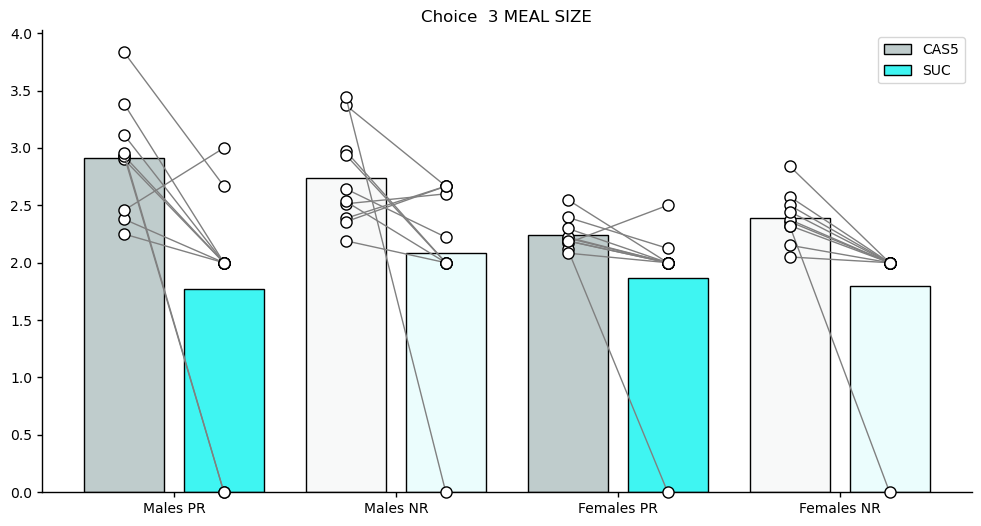

In [36]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr3= male_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()

female_nr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr3= female_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()


male_pr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr3= male_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()


female_pr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr3= female_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()

cas5_mpr3= average_pellets_per_type_mpr3['CAS5']
suc_mpr3= average_pellets_per_type_mpr3['SUC']
cas5_fpr3= average_pellets_per_type_fpr3['CAS5']
suc_fpr3= average_pellets_per_type_fpr3['SUC']

cas5_mnr3= average_pellets_per_type_mnr3['CAS5']
suc_mnr3= average_pellets_per_type_mnr3['SUC']
cas5_fnr3= average_pellets_per_type_fnr3['CAS5']
suc_fnr3= average_pellets_per_type_fnr3['SUC']

group_data_male_pr = [cas5_mpr3.tolist(), suc_mpr3.tolist()]
group_data_female_pr = [cas5_fpr3.tolist(), suc_fpr3.tolist()]
group_data_male_nr = [cas5_mnr3.tolist(), suc_mnr3.tolist()]
group_data_female_nr = [cas5_fnr3.tolist(), suc_fnr3.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  3 MEAL SIZE")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C3_MEAL_SIZE.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


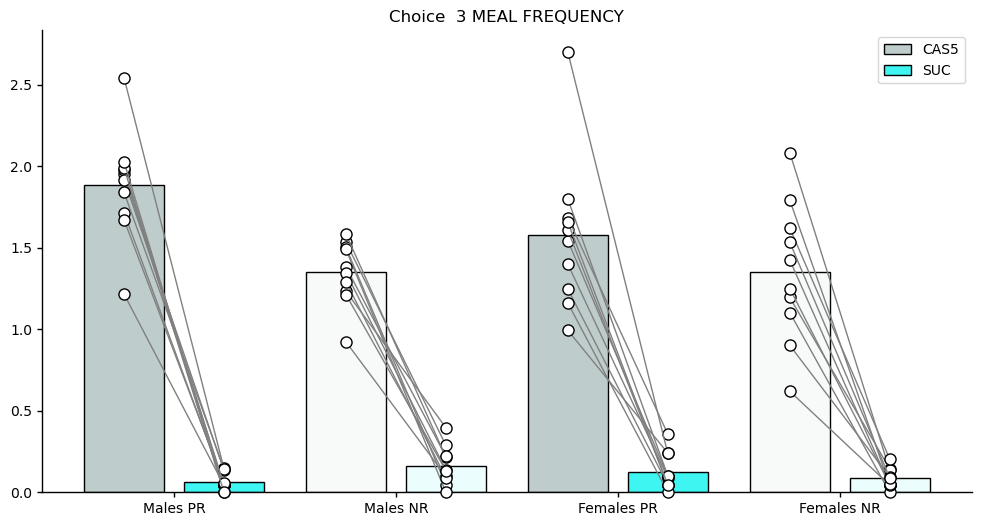

In [37]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr3= male_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()

female_nr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr3= female_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()


male_pr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr3= male_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()


female_pr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr3= female_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()

cas5_mpr3= average_pellets_per_type_mpr3['CAS5']
suc_mpr3= average_pellets_per_type_mpr3['SUC']
cas5_fpr3= average_pellets_per_type_fpr3['CAS5']
suc_fpr3= average_pellets_per_type_fpr3['SUC']

cas5_mnr3= average_pellets_per_type_mnr3['CAS5']
suc_mnr3= average_pellets_per_type_mnr3['SUC']
cas5_fnr3= average_pellets_per_type_fnr3['CAS5']
suc_fnr3= average_pellets_per_type_fnr3['SUC']

group_data_male_pr = [cas5_mpr3.tolist(), suc_mpr3.tolist()]
group_data_female_pr = [cas5_fpr3.tolist(), suc_fpr3.tolist()]
group_data_male_nr = [cas5_mnr3.tolist(), suc_mnr3.tolist()]
group_data_female_nr = [cas5_fnr3.tolist(), suc_fnr3.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  3 MEAL FREQUENCY")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()
f.savefig(fig_folder + "C3_MEAL_FREQ.png")


C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


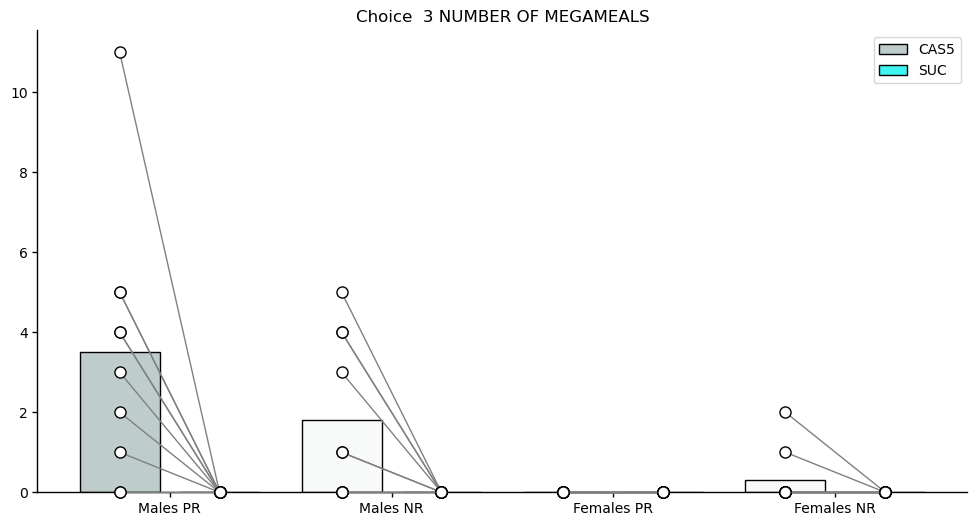

In [38]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr3= male_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

female_nr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr3= female_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


male_pr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr3= male_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


female_pr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr3= female_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

cas5_mpr3= average_pellets_per_type_mpr3['CAS5']
suc_mpr3= average_pellets_per_type_mpr3['SUC']
cas5_fpr3= average_pellets_per_type_fpr3['CAS5']
suc_fpr3= average_pellets_per_type_fpr3['SUC']

cas5_mnr3= average_pellets_per_type_mnr3['CAS5']
suc_mnr3= average_pellets_per_type_mnr3['SUC']
cas5_fnr3= average_pellets_per_type_fnr3['CAS5']
suc_fnr3= average_pellets_per_type_fnr3['SUC']

group_data_male_pr = [cas5_mpr3.tolist(), suc_mpr3.tolist()]
group_data_female_pr = [cas5_fpr3.tolist(), suc_fpr3.tolist()]
group_data_male_nr = [cas5_mnr3.tolist(), suc_mnr3.tolist()]
group_data_female_nr = [cas5_fnr3.tolist(), suc_fnr3.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  3 NUMBER OF MEGAMEALS")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C3_N_MEGAMEALS.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


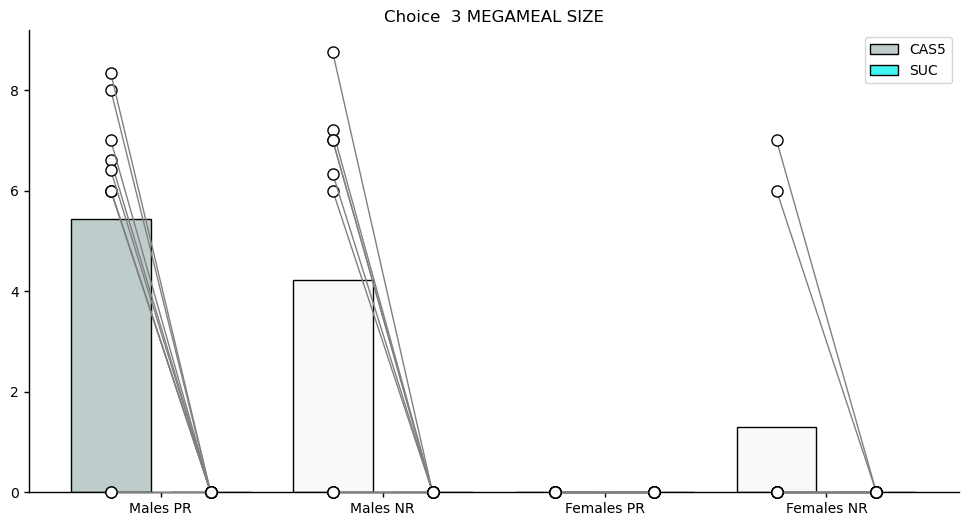

In [39]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr3= male_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()

female_nr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr3= female_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()


male_pr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr3= male_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()


female_pr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr3= female_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()

cas5_mpr3= average_pellets_per_type_mpr3['CAS5']
suc_mpr3= average_pellets_per_type_mpr3['SUC']
cas5_fpr3= average_pellets_per_type_fpr3['CAS5']
suc_fpr3= average_pellets_per_type_fpr3['SUC']

cas5_mnr3= average_pellets_per_type_mnr3['CAS5']
suc_mnr3= average_pellets_per_type_mnr3['SUC']
cas5_fnr3= average_pellets_per_type_fnr3['CAS5']
suc_fnr3= average_pellets_per_type_fnr3['SUC']

group_data_male_pr = [cas5_mpr3.tolist(), suc_mpr3.tolist()]
group_data_female_pr = [cas5_fpr3.tolist(), suc_fpr3.tolist()]
group_data_male_nr = [cas5_mnr3.tolist(), suc_mnr3.tolist()]
group_data_female_nr = [cas5_fnr3.tolist(), suc_fnr3.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  3 MEGAMEAL SIZE")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C3_MEGAMEAL_SIZE.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


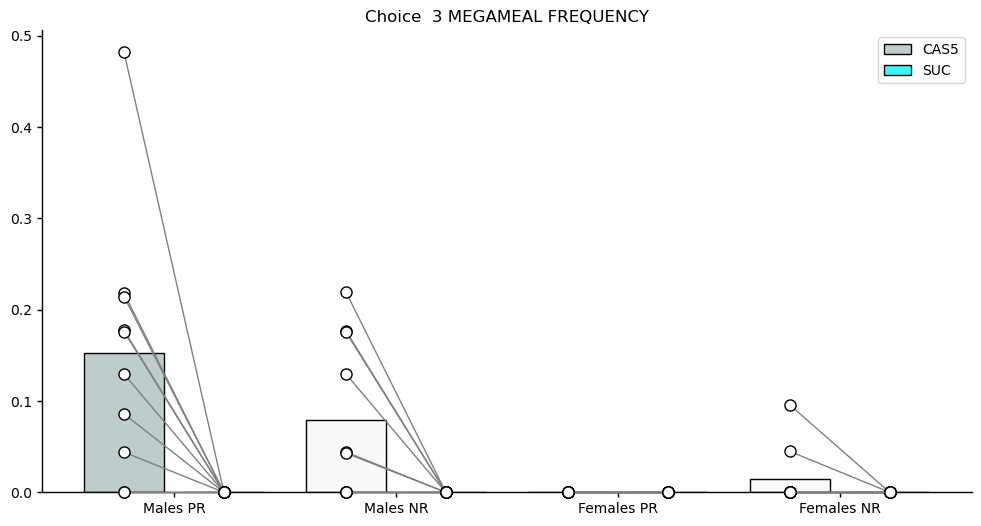

In [40]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr3= male_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()

female_nr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr3= female_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()


male_pr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr3= male_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()


female_pr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr3= female_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()

cas5_mpr3= average_pellets_per_type_mpr3['CAS5']
suc_mpr3= average_pellets_per_type_mpr3['SUC']
cas5_fpr3= average_pellets_per_type_fpr3['CAS5']
suc_fpr3= average_pellets_per_type_fpr3['SUC']

cas5_mnr3= average_pellets_per_type_mnr3['CAS5']
suc_mnr3= average_pellets_per_type_mnr3['SUC']
cas5_fnr3= average_pellets_per_type_fnr3['CAS5']
suc_fnr3= average_pellets_per_type_fnr3['SUC']

group_data_male_pr = [cas5_mpr3.tolist(), suc_mpr3.tolist()]
group_data_female_pr = [cas5_fpr3.tolist(), suc_fpr3.tolist()]
group_data_male_nr = [cas5_mnr3.tolist(), suc_mnr3.tolist()]
group_data_female_nr = [cas5_fnr3.tolist(), suc_fnr3.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  3 MEGAMEAL FREQUENCY")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C3_MEGAMEAL_FREQ.png")

<a id="Choice_3_SNACK_COMPONENT"></a>
## Choice_3_SNACK_COMPONENT

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


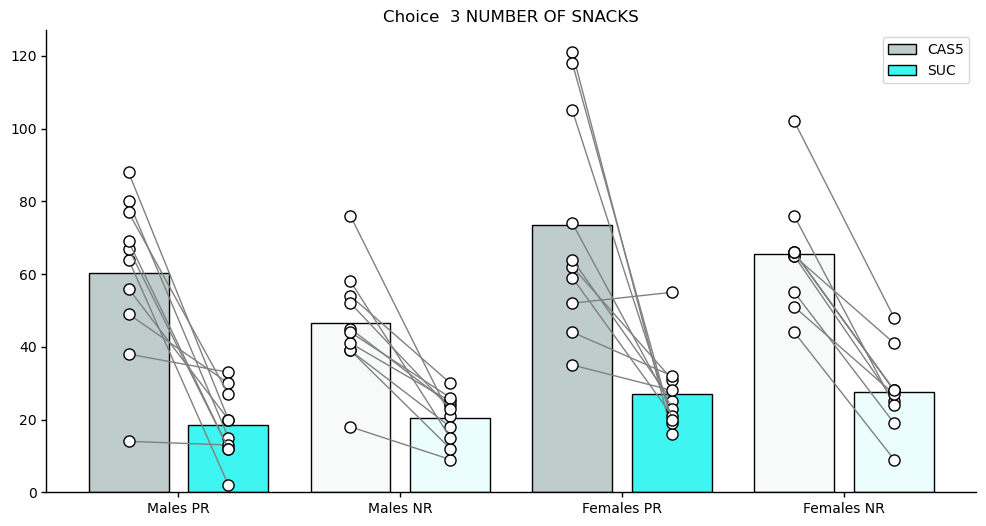

In [41]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr3= male_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()

female_nr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr3= female_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()


male_pr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr3= male_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()


female_pr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr3= female_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()

cas5_mpr3= average_pellets_per_type_mpr3['CAS5']
suc_mpr3= average_pellets_per_type_mpr3['SUC']
cas5_fpr3= average_pellets_per_type_fpr3['CAS5']
suc_fpr3= average_pellets_per_type_fpr3['SUC']

cas5_mnr3= average_pellets_per_type_mnr3['CAS5']
suc_mnr3= average_pellets_per_type_mnr3['SUC']
cas5_fnr3= average_pellets_per_type_fnr3['CAS5']
suc_fnr3= average_pellets_per_type_fnr3['SUC']

group_data_male_pr = [cas5_mpr3.tolist(), suc_mpr3.tolist()]
group_data_female_pr = [cas5_fpr3.tolist(), suc_fpr3.tolist()]
group_data_male_nr = [cas5_mnr3.tolist(), suc_mnr3.tolist()]
group_data_female_nr = [cas5_fnr3.tolist(), suc_fnr3.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  3 NUMBER OF SNACKS")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C3_N_SNACKS.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


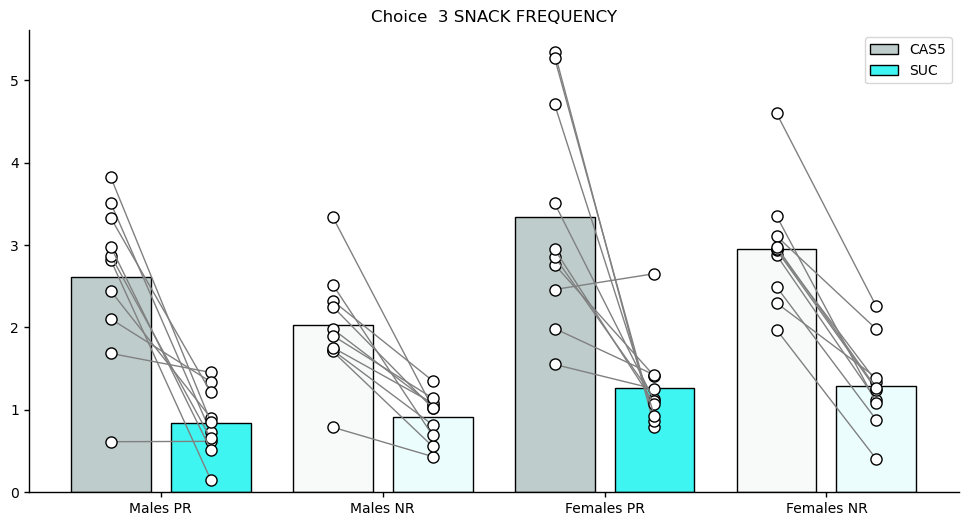

In [42]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr3= male_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()

female_nr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr3= female_nr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()


male_pr_pellet_C3 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr3= male_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()


female_pr_pellet_C3 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 3) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr3= female_pr_pellet_C3.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()

cas5_mpr3= average_pellets_per_type_mpr3['CAS5']
suc_mpr3= average_pellets_per_type_mpr3['SUC']
cas5_fpr3= average_pellets_per_type_fpr3['CAS5']
suc_fpr3= average_pellets_per_type_fpr3['SUC']

cas5_mnr3= average_pellets_per_type_mnr3['CAS5']
suc_mnr3= average_pellets_per_type_mnr3['SUC']
cas5_fnr3= average_pellets_per_type_fnr3['CAS5']
suc_fnr3= average_pellets_per_type_fnr3['SUC']

group_data_male_pr = [cas5_mpr3.tolist(), suc_mpr3.tolist()]
group_data_female_pr = [cas5_fpr3.tolist(), suc_fpr3.tolist()]
group_data_male_nr = [cas5_mnr3.tolist(), suc_mnr3.tolist()]
group_data_female_nr = [cas5_fnr3.tolist(), suc_fnr3.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  3 SNACK FREQUENCY")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C3_SNAKC_FREQ.png")

<a id="Choice_4_MEAL_COMPONENT"></a>
## Choice_4_MEAL_COMPONENT

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


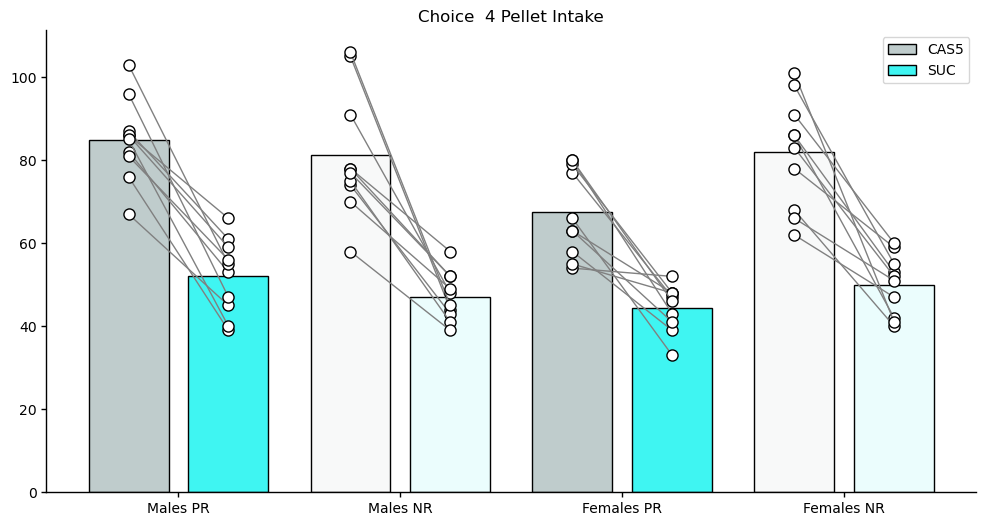

In [43]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr4= male_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()

female_nr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr4= female_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()


male_pr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr4= male_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()


female_pr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr4= female_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['COUNT'].mean().unstack()

cas5_mpr4= average_pellets_per_type_mpr4['CAS5']
suc_mpr4= average_pellets_per_type_mpr4['SUC']
cas5_fpr4= average_pellets_per_type_fpr4['CAS5']
suc_fpr4= average_pellets_per_type_fpr4['SUC']

cas5_mnr4= average_pellets_per_type_mnr4['CAS5']
suc_mnr4= average_pellets_per_type_mnr4['SUC']
cas5_fnr4= average_pellets_per_type_fnr4['CAS5']
suc_fnr4= average_pellets_per_type_fnr4['SUC']

group_data_male_pr = [cas5_mpr4.tolist(), suc_mpr4.tolist()]
group_data_female_pr = [cas5_fpr4.tolist(), suc_fpr4.tolist()]
group_data_male_nr = [cas5_mnr4.tolist(), suc_mnr4.tolist()]
group_data_female_nr = [cas5_fnr4.tolist(), suc_fnr4.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  4 Pellet Intake")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C4_PELLET_INTAKE.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


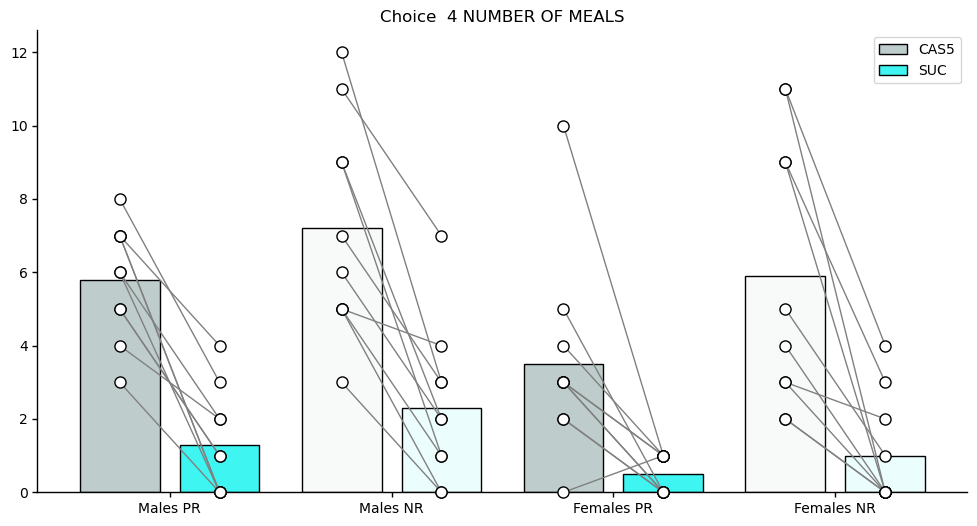

In [44]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr4= male_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()

female_nr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr4= female_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()


male_pr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr4= male_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()


female_pr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr4= female_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEALS'].mean().unstack()

cas5_mpr4= average_pellets_per_type_mpr4['CAS5']
suc_mpr4= average_pellets_per_type_mpr4['SUC']
cas5_fpr4= average_pellets_per_type_fpr4['CAS5']
suc_fpr4= average_pellets_per_type_fpr4['SUC']

cas5_mnr4= average_pellets_per_type_mnr4['CAS5']
suc_mnr4= average_pellets_per_type_mnr4['SUC']
cas5_fnr4= average_pellets_per_type_fnr4['CAS5']
suc_fnr4= average_pellets_per_type_fnr4['SUC']

group_data_male_pr = [cas5_mpr4.tolist(), suc_mpr4.tolist()]
group_data_female_pr = [cas5_fpr4.tolist(), suc_fpr4.tolist()]
group_data_male_nr = [cas5_mnr4.tolist(), suc_mnr4.tolist()]
group_data_female_nr = [cas5_fnr4.tolist(), suc_fnr4.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  4 NUMBER OF MEALS")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()


f.savefig(fig_folder + "C4_N_MEALS.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


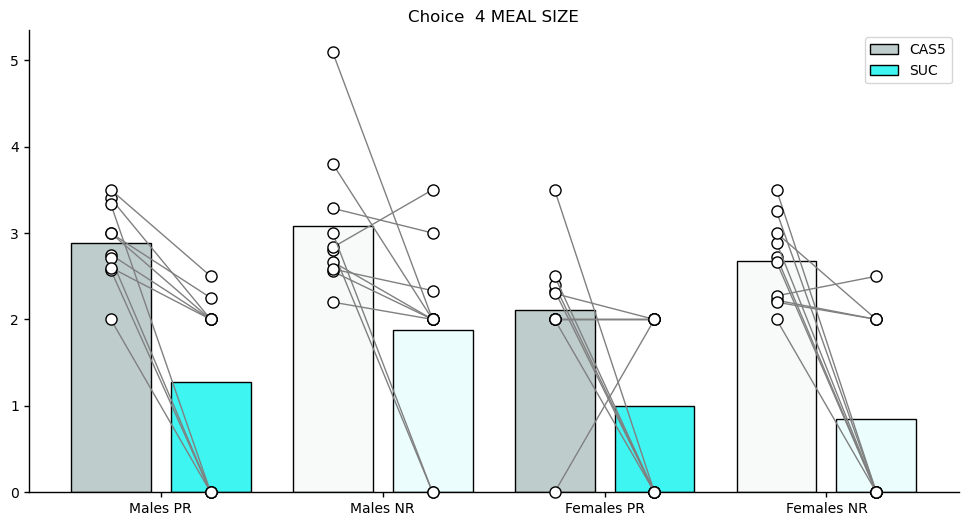

In [45]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr4= male_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()

female_nr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr4= female_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()


male_pr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr4= male_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()


female_pr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr4= female_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_SIZE'].mean().unstack()

cas5_mpr4= average_pellets_per_type_mpr4['CAS5']
suc_mpr4= average_pellets_per_type_mpr4['SUC']
cas5_fpr4= average_pellets_per_type_fpr4['CAS5']
suc_fpr4= average_pellets_per_type_fpr4['SUC']

cas5_mnr4= average_pellets_per_type_mnr4['CAS5']
suc_mnr4= average_pellets_per_type_mnr4['SUC']
cas5_fnr4= average_pellets_per_type_fnr4['CAS5']
suc_fnr4= average_pellets_per_type_fnr4['SUC']

group_data_male_pr = [cas5_mpr4.tolist(), suc_mpr4.tolist()]
group_data_female_pr = [cas5_fpr4.tolist(), suc_fpr4.tolist()]
group_data_male_nr = [cas5_mnr4.tolist(), suc_mnr4.tolist()]
group_data_female_nr = [cas5_fnr4.tolist(), suc_fnr4.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  4 MEAL SIZE")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()


f.savefig(fig_folder + "C4_MEALS_SIZE.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


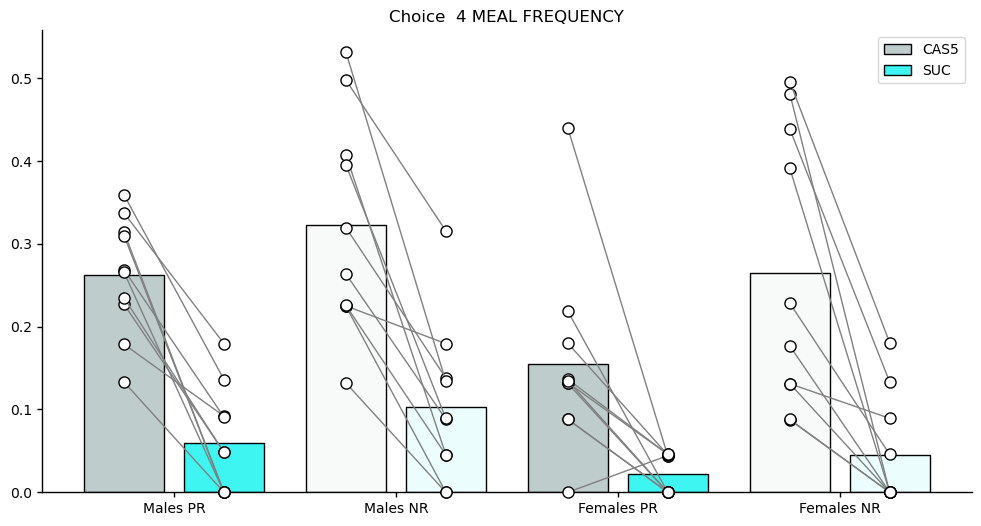

In [46]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr4= male_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()

female_nr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr4= female_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()


male_pr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr4= male_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()


female_pr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr4= female_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['MEAL_FREQUENCY'].mean().unstack()

cas5_mpr4= average_pellets_per_type_mpr4['CAS5']
suc_mpr4= average_pellets_per_type_mpr4['SUC']
cas5_fpr4= average_pellets_per_type_fpr4['CAS5']
suc_fpr4= average_pellets_per_type_fpr4['SUC']

cas5_mnr4= average_pellets_per_type_mnr4['CAS5']
suc_mnr4= average_pellets_per_type_mnr4['SUC']
cas5_fnr4= average_pellets_per_type_fnr4['CAS5']
suc_fnr4= average_pellets_per_type_fnr4['SUC']

group_data_male_pr = [cas5_mpr4.tolist(), suc_mpr4.tolist()]
group_data_female_pr = [cas5_fpr4.tolist(), suc_fpr4.tolist()]
group_data_male_nr = [cas5_mnr4.tolist(), suc_mnr4.tolist()]
group_data_female_nr = [cas5_fnr4.tolist(), suc_fnr4.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  4 MEAL FREQUENCY")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()


f.savefig(fig_folder + "C4_MEAL_FREQ.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


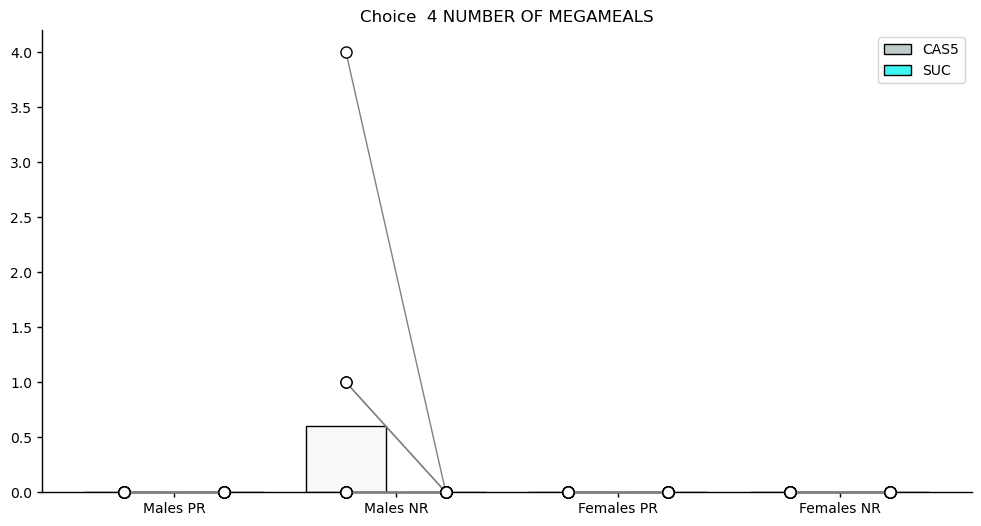

In [47]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr4= male_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

female_nr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr4= female_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


male_pr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr4= male_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()


female_pr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr4= female_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_MEGA_MEALS'].mean().unstack()

cas5_mpr4= average_pellets_per_type_mpr4['CAS5']
suc_mpr4= average_pellets_per_type_mpr4['SUC']
cas5_fpr4= average_pellets_per_type_fpr4['CAS5']
suc_fpr4= average_pellets_per_type_fpr4['SUC']

cas5_mnr4= average_pellets_per_type_mnr4['CAS5']
suc_mnr4= average_pellets_per_type_mnr4['SUC']
cas5_fnr4= average_pellets_per_type_fnr4['CAS5']
suc_fnr4= average_pellets_per_type_fnr4['SUC']

group_data_male_pr = [cas5_mpr4.tolist(), suc_mpr4.tolist()]
group_data_female_pr = [cas5_fpr4.tolist(), suc_fpr4.tolist()]
group_data_male_nr = [cas5_mnr4.tolist(), suc_mnr4.tolist()]
group_data_female_nr = [cas5_fnr4.tolist(), suc_fnr4.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  4 NUMBER OF MEGAMEALS")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()


f.savefig(fig_folder + "C4_N_MEGAMEAL.png")

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


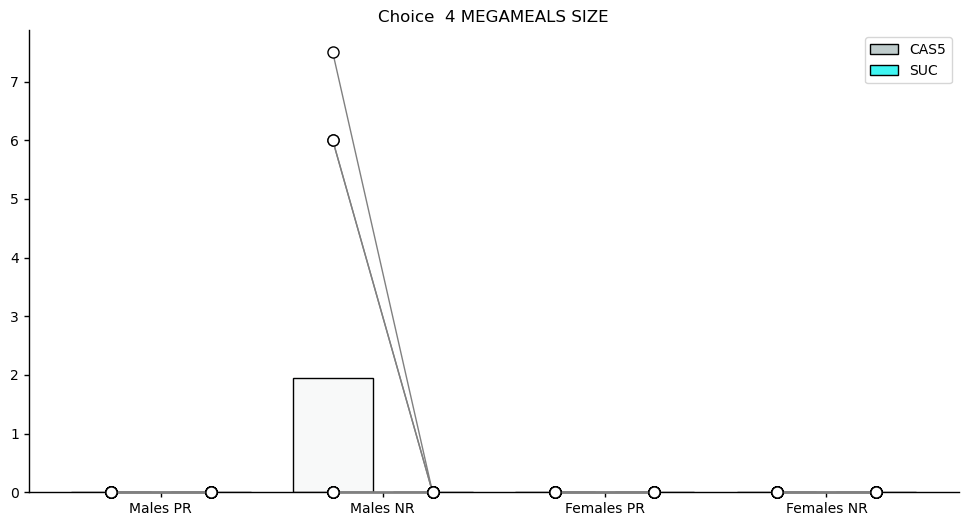

In [48]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr4= male_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()

female_nr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr4= female_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()


male_pr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr4= male_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()


female_pr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr4= female_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['AVERAGE_MEGA_MEAL_SIZE'].mean().unstack()

cas5_mpr4= average_pellets_per_type_mpr4['CAS5']
suc_mpr4= average_pellets_per_type_mpr4['SUC']
cas5_fpr4= average_pellets_per_type_fpr4['CAS5']
suc_fpr4= average_pellets_per_type_fpr4['SUC']

cas5_mnr4= average_pellets_per_type_mnr4['CAS5']
suc_mnr4= average_pellets_per_type_mnr4['SUC']
cas5_fnr4= average_pellets_per_type_fnr4['CAS5']
suc_fnr4= average_pellets_per_type_fnr4['SUC']

group_data_male_pr = [cas5_mpr4.tolist(), suc_mpr4.tolist()]
group_data_female_pr = [cas5_fpr4.tolist(), suc_fpr4.tolist()]
group_data_male_nr = [cas5_mnr4.tolist(), suc_mnr4.tolist()]
group_data_female_nr = [cas5_fnr4.tolist(), suc_fnr4.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  4 MEGAMEALS SIZE")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C4_MEGAMEAL_SIZE.png")


C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


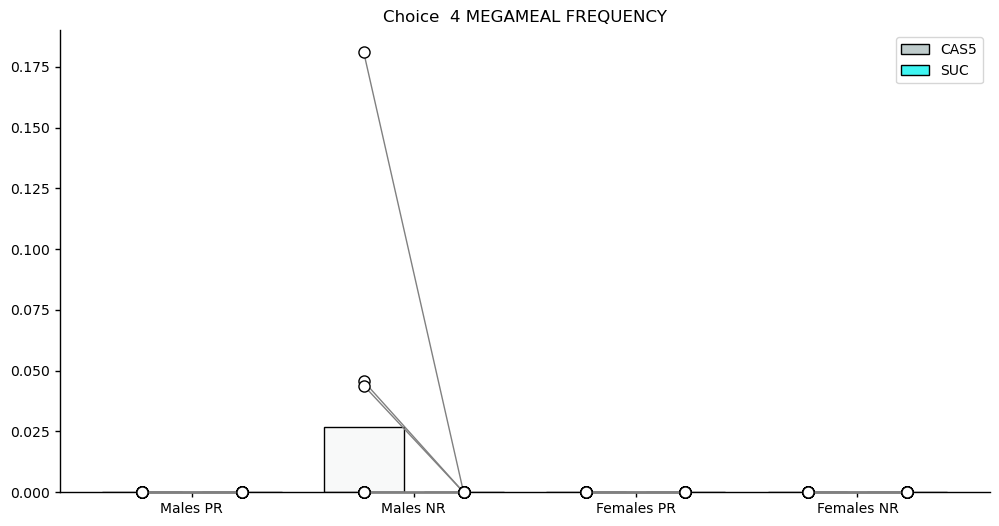

In [49]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr4= male_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()

female_nr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr4= female_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()


male_pr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr4= male_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()


female_pr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr4= female_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['MEGA_MEAL_FREQUENCY'].mean().unstack()

cas5_mpr4= average_pellets_per_type_mpr4['CAS5']
suc_mpr4= average_pellets_per_type_mpr4['SUC']
cas5_fpr4= average_pellets_per_type_fpr4['CAS5']
suc_fpr4= average_pellets_per_type_fpr4['SUC']

cas5_mnr4= average_pellets_per_type_mnr4['CAS5']
suc_mnr4= average_pellets_per_type_mnr4['SUC']
cas5_fnr4= average_pellets_per_type_fnr4['CAS5']
suc_fnr4= average_pellets_per_type_fnr4['SUC']

group_data_male_pr = [cas5_mpr4.tolist(), suc_mpr4.tolist()]
group_data_female_pr = [cas5_fpr4.tolist(), suc_fpr4.tolist()]
group_data_male_nr = [cas5_mnr4.tolist(), suc_mnr4.tolist()]
group_data_female_nr = [cas5_fnr4.tolist(), suc_fnr4.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  4 MEGAMEAL FREQUENCY")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()


f.savefig(fig_folder + "C4_MEGAMEAL_FREQ.png")

<a id="Choice_4_SNACK_COMPONENT"></a>
## Choice_4_SNACK_COMPONENT

C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


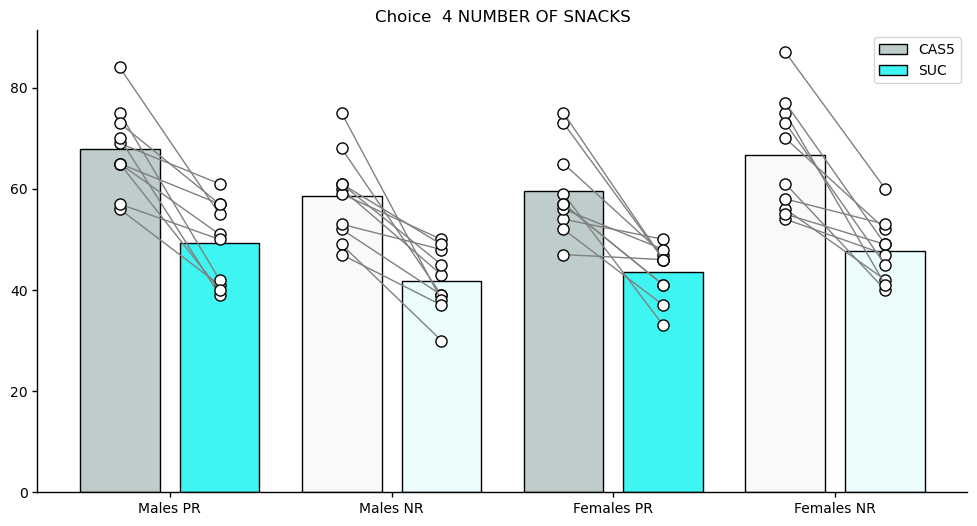

In [50]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr4= male_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()

female_nr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr4= female_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()


male_pr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr4= male_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()


female_pr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr4= female_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['NUMBER_OF_SNACKS'].mean().unstack()

cas5_mpr4= average_pellets_per_type_mpr4['CAS5']
suc_mpr4= average_pellets_per_type_mpr4['SUC']
cas5_fpr4= average_pellets_per_type_fpr4['CAS5']
suc_fpr4= average_pellets_per_type_fpr4['SUC']

cas5_mnr4= average_pellets_per_type_mnr4['CAS5']
suc_mnr4= average_pellets_per_type_mnr4['SUC']
cas5_fnr4= average_pellets_per_type_fnr4['CAS5']
suc_fnr4= average_pellets_per_type_fnr4['SUC']

group_data_male_pr = [cas5_mpr4.tolist(), suc_mpr4.tolist()]
group_data_female_pr = [cas5_fpr4.tolist(), suc_fpr4.tolist()]
group_data_male_nr = [cas5_mnr4.tolist(), suc_mnr4.tolist()]
group_data_female_nr = [cas5_fnr4.tolist(), suc_fnr4.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  4 NUMBER OF SNACKS")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()

f.savefig(fig_folder + "C4_N_SNACKS.png")


C:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


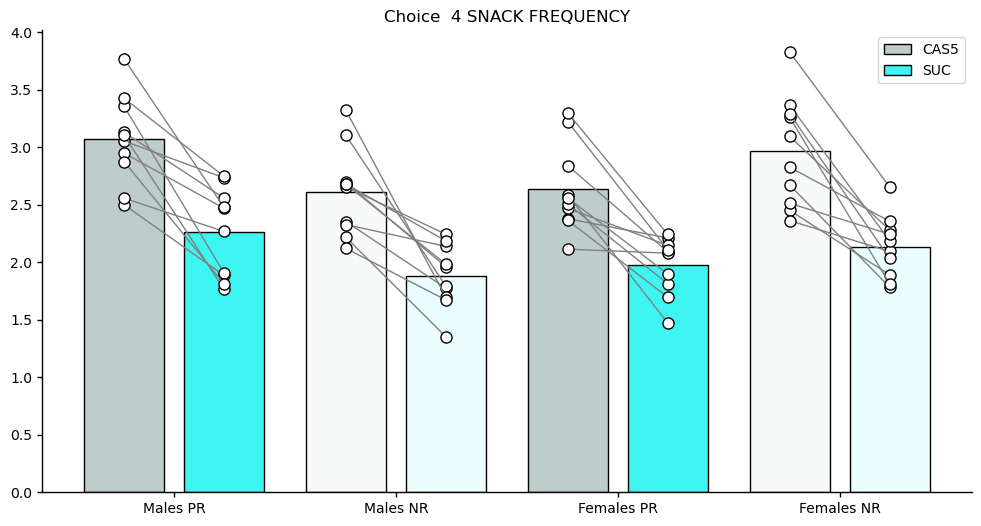

In [51]:
# Filter the data for male PR mice in choice session 1
male_nr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_mnr4= male_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()

female_nr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'NR')]
average_pellets_per_type_fnr4= female_nr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()


male_pr_pellet_C4 = data[(data['SEX'] == 'M') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_mpr4= male_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()


female_pr_pellet_C4 = data[(data['SEX'] == 'F') & (data['CHOICE_SESSION'] == 4) & (data['DIET'] == 'PR')]
average_pellets_per_type_fpr4= female_pr_pellet_C4.groupby(['MOUSEID', 'PELLET_TYPE'])['SNACK_FREQUENCY'].mean().unstack()

cas5_mpr4= average_pellets_per_type_mpr4['CAS5']
suc_mpr4= average_pellets_per_type_mpr4['SUC']
cas5_fpr4= average_pellets_per_type_fpr4['CAS5']
suc_fpr4= average_pellets_per_type_fpr4['SUC']

cas5_mnr4= average_pellets_per_type_mnr4['CAS5']
suc_mnr4= average_pellets_per_type_mnr4['SUC']
cas5_fnr4= average_pellets_per_type_fnr4['CAS5']
suc_fnr4= average_pellets_per_type_fnr4['SUC']

group_data_male_pr = [cas5_mpr4.tolist(), suc_mpr4.tolist()]
group_data_female_pr = [cas5_fpr4.tolist(), suc_fpr4.tolist()]
group_data_male_nr = [cas5_mnr4.tolist(), suc_mnr4.tolist()]
group_data_female_nr = [cas5_fnr4.tolist(), suc_fnr4.tolist()]

# Plotting using barscatter

cas20_color_PR = (0.749, 0.8, 0.8)
cas5_color_PR = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
cas20_color_NR = (0.749, 0.8, 0.8, 0.1)
cas5_color_NR = (0.247, 0.961, 0.949, 0.1)




f, ax = plt.subplots(figsize=(12,6))
_, _, barlist, _ = tp.barscatter([group_data_male_pr, group_data_male_nr,group_data_female_pr,group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.90,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*10,
                                 barfacecolor=[cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR,cas20_color_PR, cas5_color_PR, cas20_color_NR, cas5_color_NR],
                                 positions=[1, 1.5, 3, 3.5], # Adjust positions for clarity
                                )

ax.set_title("Choice  4 SNACK FREQUENCY")
ax.legend(barlist, ['CAS5', 'SUC'])

# Set custom x-axis labels
group_labels = ['Males PR', 'Males NR','Females PR', 'Females NR']
ax.set_xticks([1,2,3,4])  # Mid-point of each group of bars
ax.set_xticklabels(group_labels)

plt.show()


f.savefig(fig_folder + "C4_SNACK_FREQ.png")

In [52]:
file_path = '../results/HOURLY_PELLET.csv'
HDATA = pd.read_csv(file_path)
HDATA

MOUSEID SEX DIET  CHOICE_SESSION PELLET_TYPE  Hour_1  Hour_2  Hour_3  \
0     FEDXDF1   F   PR               0         MIX     7.0     0.0    22.0   
1     FEDXDF1   F   PR               0         MIX     0.0     0.0     2.0   
2     FEDXDF2   F   PR               0         MIX    30.0     3.0     0.0   
3     FEDXDF2   F   PR               0         MIX     2.0     2.0     0.0   
4     FEDXDF3   F   PR               0         MIX    23.0     9.0     1.0   
5     FEDXDF3   F   PR               0         MIX     7.0     0.0     0.0   
6     FEDXDF4   F   PR               0         MIX    23.0     0.0     3.0   
7     FEDXDF4   F   PR               0         MIX     4.0     0.0     0.0   
8     FEDXDF5   F   PR               0         MIX     0.0    13.0     9.0   
9     FEDXDF5   F   PR               0         MIX     0.0     0.0     0.0   
10    FEDXDF6   F   PR               0         MIX     0.0    17.0     5.0   
11    FEDXDF6   F   PR               0         MIX     0.0     0.0     4.0   
12    FEDXDF7   F   PR               0         MIX    22.0     6.0     0.0   
13    FEDXDF7   F   PR               0         MIX     4.0     6.0     0.0   
14    FEDXDF8   F   PR               0         MIX    23.0     0.0     1.0   
15    FEDXDF8   F   PR               0         MIX     0.0     5.0     0.0   
16    FEDXDF9   F   PR               0         MIX    10.0     0.0     6.0   
17    FEDXDF9   F   PR               0         MIX     0.0     0.0     0.0   
18   FEDXDF10   F   PR               0         MIX    12.0     0.0     0.0   
19   FEDXDF10   F   PR               0         MIX     2.0     0.0     0.0   
20    FEDXDF1   F   PR               1       CAS20     8.0     5.0     0.0   
21    FEDXDF2   F   PR               1       CAS20     6.0     7.0     0.0   
22    FEDXDF3   F   PR               1       CAS20     3.0     7.0     5.0   
23    FEDXDF4   F   PR               1       CAS20     8.0     0.0     0.0   
24    FEDXDF5   F   PR               1       CAS20     3.0     6.0     2.0   
25    FEDXDF6   F   PR               1       CAS20     6.0    10.0     3.0   
26    FEDXDF7   F   PR               1       CAS20     7.0     5.0     9.0   
27    FEDXDF8   F   PR               1       CAS20     7.0     1.0     0.0   
28    FEDXDF9   F   PR               1       CAS20     3.0     8.0     1.0   
29   FEDXDF10   F   PR               1       CAS20     1.0     9.0     0.0   
30    FEDXDF1   F   PR               1        CAS5     5.0     5.0     0.0   
31    FEDXDF2   F   PR               1        CAS5     2.0     2.0     0.0   
32    FEDXDF3   F   PR               1        CAS5     4.0     7.0     2.0   
33    FEDXDF4   F   PR               1        CAS5     3.0     0.0     0.0   
34    FEDXDF5   F   PR               1        CAS5     4.0     5.0     1.0   
35    FEDXDF6   F   PR               1        CAS5     5.0     5.0     1.0   
36    FEDXDF7   F   PR               1        CAS5     6.0     8.0     5.0   
37    FEDXDF8   F   PR               1        CAS5     2.0     6.0     0.0   
38    FEDXDF9   F   PR               1        CAS5     7.0     3.0     0.0   
39   FEDXDF10   F   PR               1        CAS5     4.0     3.0     1.0   
40    FEDXDF1   F   PR               2       CAS20    15.0     1.0     0.0   
41    FEDXDF2   F   PR               2       CAS20     9.0     0.0     0.0   
42    FEDXDF3   F   PR               2       CAS20    10.0     0.0     0.0   
43    FEDXDF4   F   PR               2       CAS20     4.0     0.0     0.0   
44    FEDXDF5   F   PR               2       CAS20    11.0    10.0     0.0   
45    FEDXDF6   F   PR               2       CAS20    12.0    12.0     0.0   
46    FEDXDF7   F   PR               2       CAS20    15.0    12.0     4.0   
47    FEDXDF8   F   PR               2       CAS20    10.0     3.0     0.0   
48    FEDXDF9   F   PR               2       CAS20    13.0     5.0     0.0   
49   FEDXDF10   F   PR               2       CAS20     4.0     0.0    10.0   
50    FEDXDF1   F   PR      

In [166]:
male_pr_hourly_C1_CAS20 = HDATA[(HDATA['SEX'] == 'M') & (HDATA['CHOICE_SESSION'] == 1) & (HDATA['DIET'] == 'PR') & (HDATA["PELLET_TYPE"] == "CAS20")]
male_pr_hourly_C1_CAS5 = HDATA[(HDATA['SEX'] == 'M') & (HDATA['CHOICE_SESSION'] == 1) & (HDATA['DIET'] == 'PR') & (HDATA["PELLET_TYPE"] == "CAS5")]
male_nr_hourly_C1_CAS20 = HDATA[(HDATA['SEX'] == 'M') & (HDATA['CHOICE_SESSION'] == 1) & (HDATA['DIET'] == 'NR') & (HDATA["PELLET_TYPE"] == "CAS20")]
male_nr_hourly_C1_CAS5 = HDATA[(HDATA['SEX'] == 'M') & (HDATA['CHOICE_SESSION'] == 1) & (HDATA['DIET'] == 'NR') & (HDATA["PELLET_TYPE"] == "CAS5")]



male_pr_hourly_C2_CAS20 = HDATA[(HDATA['SEX'] == 'M') & (HDATA['CHOICE_SESSION'] == 2) & (HDATA['DIET'] == 'PR') & (HDATA["PELLET_TYPE"] == "CAS20")]
male_pr_hourly_C2_SUC = HDATA[(HDATA['SEX'] == 'M') & (HDATA['CHOICE_SESSION'] == 2) & (HDATA['DIET'] == 'PR') & (HDATA["PELLET_TYPE"] == "SUC")]
male_nr_hourly_C2_CAS20 = HDATA[(HDATA['SEX'] == 'M') & (HDATA['CHOICE_SESSION'] == 2) & (HDATA['DIET'] == 'NR') & (HDATA["PELLET_TYPE"] == "CAS20")]
male_nr_hourly_C2_SUC = HDATA[(HDATA['SEX'] == 'M') & (HDATA['CHOICE_SESSION'] == 2) & (HDATA['DIET'] == 'NR') & (HDATA["PELLET_TYPE"] == "SUC")]

In [168]:
CAS20_PR = male_pr_hourly_C1_CAS20.iloc[:, 5:-26]
CAS5_PR = male_pr_hourly_C1_CAS5.iloc[:, 5:-26]
CAS20_NR = male_nr_hourly_C1_CAS20.iloc[:, 5:-26]
CAS5_NR = male_nr_hourly_C1_CAS5.iloc[:, 5:-26]



CAS20_PR_C2= male_pr_hourly_C2_CAS20.iloc[:, 5:-26]
SUC_PR_C2 = male_pr_hourly_C2_SUC.iloc[:, 5:-26]
CAS20_NR_C2 = male_nr_hourly_C2_CAS20.iloc[:, 5:-26]
SUC_NR_C2 = male_nr_hourly_C2_SUC.iloc[:, 5:-26]

Text(0.5, 1.07, 'Average number of meals')

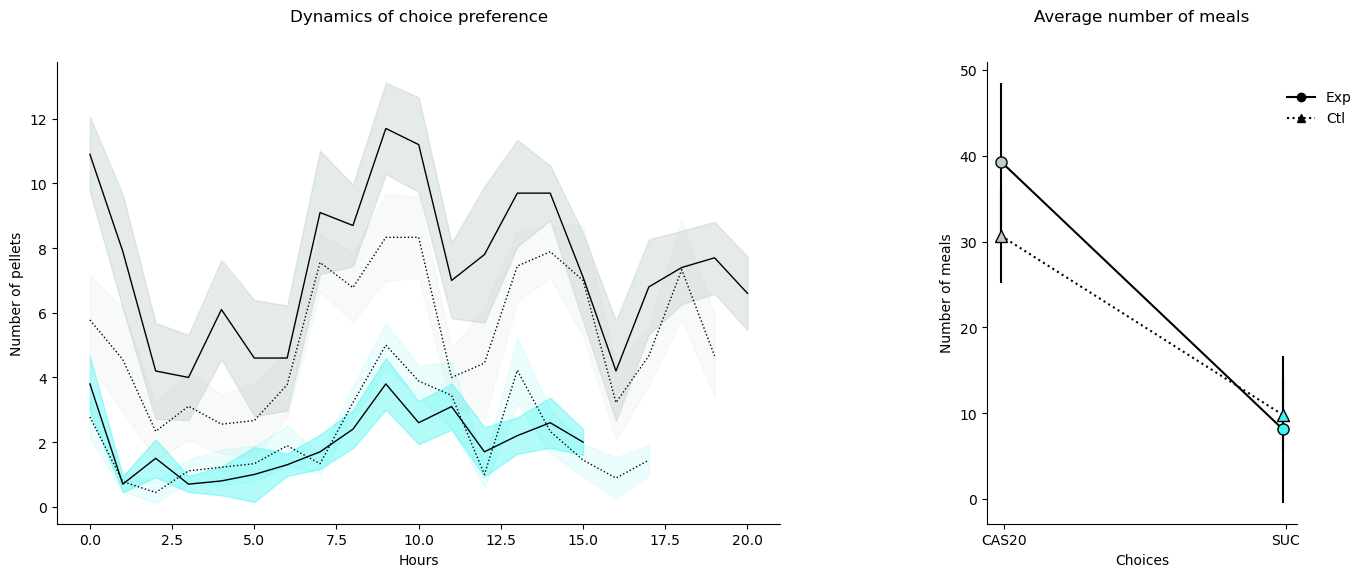

In [230]:



f, [ax1,ax2] = plt.subplots(figsize=(16,6), ncols=2,
                            sharey=False,
                           gridspec_kw={"width_ratios":[0.7,0.3],
                                        "right":0.9, 
                                        "wspace":0.4})
tp.shadedError(ax1,CAS20_PR_C2,linecolor="black",errorcolor= cas20_color_PR  )
tp.shadedError(ax1,SUC_PR_C2,linecolor="black", errorcolor= cas5_color_PR  )
tp.shadedError(ax1,CAS20_NR_C2,linecolor="black", errorcolor=cas20_color_NR, linestyle="dotted",alpha= 0.1 )
tp.shadedError(ax1,SUC_NR_C2,linecolor="black", errorcolor= cas5_color_NR,  linestyle="dotted",alpha= 0.1)

######################################################################################
ax1.set_ylabel("Number of pellets")
ax1.set_xlabel("Hours")
# ax1.axvline(6,color="k",linestyle=":", alpha= 0.3)
# ax1.axvline(13,color="k",linestyle=":", alpha= 0.3)
# ax1.set_xticks([0,6,13,20],labels=["1","7","14","21"])
# ax1.text(2.5,3.25,"Epoch 1", ha="center")
# ax1.text(10,3.25,"Epoch 2", ha="center")
# ax1.text(17.5,3.25,"Epoch 3", ha="center")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)



# fed_cols = [ctl_color,exp_color]
# Ctl_patch = mpatches.Patch(color=fed_cols[0], label='Control')
# Exp_patch = mpatches.Patch(color=fed_cols[1], label='Experimental')
# ax1.legend(handles=[Ctl_patch, Exp_patch],
#              bbox_to_anchor=(0.67,0.88),
#              bbox_transform=f.transFigure)
####################################################################################


spacing=0.01


# X positions for cas20 and cas5
x_positions = [1-spacing, 2-spacing]

# Plot lines for MPR and MNR
ax2.plot(x_positions,
         [cas20_mpr2.mean(), cas5_mpr2.mean()],
         linestyle="-",
         color="black",
         marker= "o",
         label="Exp")

ax2.plot(x_positions,
         [cas20_mnr2.mean(), cas5_mnr2.mean()],
         linestyle="dotted",
         color="black",
         marker ='^',
         label="Ctl")

# Plot markers for MPR
ax2.errorbar([1-spacing],
             [cas20_mpr2.mean()],
             yerr=[cas20_mpr1.sem()],
             fmt='o',
             markerfacecolor=cas20_color_PR ,
             ms=8,
             color="black")

ax2.errorbar([2-spacing],
             [cas5_mpr2.mean()],
             yerr=[cas5_mpr1.sem()],
             fmt='o',
             markerfacecolor=cas5_color_PR,
             ms=8,
             color="black")

# Plot markers for MNR
ax2.errorbar([1-spacing],
             [cas20_mnr2.mean()],
             yerr=[cas20_mnr1.sem()],
             fmt='^-',
             markerfacecolor=cas20_color_PR,
             ms=8,
             color="black")

ax2.errorbar([2-spacing],
             [cas5_mnr2.mean()],
             yerr=[cas5_mnr1.sem()],
             fmt='^-',
             markerfacecolor=cas5_color_PR,
             ms=8,
             color="black")





ax2.set_xticks([1,2],labels=["CAS20", "SUC"])
# ax2.set_xlim([0.5,2.5])
# ax2.set_yticks([1.6,2,2.4,2.8,3.2])
ax2.set_ylabel("Number of meals")
ax2.set_xlabel("Choices")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.legend(loc=(0.95,0.85), frameon=False)

ax1.set_title("Dynamics of choice preference", y=1.07)
ax2.set_title("Average number of meals",y=1.07)

# f.subplots_adjust(wspace=0.4)

# ax1.annotate(" Ctl",[20,2.3])
# ax1.annotate(" Exp",[20,2.5], color= exp_color)

#f.savefig(fig_folder + "mealsize.pdf")

